In [1]:
!pip install stim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 35.6 MB/s eta 0:00:00


In [2]:
import stim

# Repetition code

## Bit flip

In [ ]:
def gen_rc_bf(d, r):
    # d data qubits
    dq = list(range(0, 2 * d - 1, 2))
    # d-1 ancilla qubits
    aq = list(range(1, 2 * d - 1, 2))

    c = stim.Circuit()

    # Preparation
    c.append('R', dq + aq)
    c.append('TICK')

    # Syndrome extraction
    for j in range(r):
        for i in range(len(aq)):
            c.append('CNOT', [dq[i], aq[i]])
        c.append('TICK')

        for i in range(len(aq)):
            c.append('CNOT', [dq[i+1], aq[i]])
        c.append('TICK')

        # Measure ancillas and compare to previous round
        c.append('MR', aq)
        for i in range(len(aq)):
            if j == 0:
                c.append('DETECTOR', [stim.target_rec(-len(aq) + i)], [i, j])
            else:
                c.append('DETECTOR', [stim.target_rec(-len(aq) + i),
                                      stim.target_rec(-2 * len(aq) + i)], [i, j])
        c.append('TICK')

    # Final readout of data qubits
    c.append('M', dq)

    # Final detectors to close out the graph
    for i in range(len(aq)):
        c.append('DETECTOR', [stim.target_rec(-d + i),
                              stim.target_rec(-d + i + 1),
                              stim.target_rec(-d - len(aq) + i)], [i, r])

    # Logical observable
    c.append('OBSERVABLE_INCLUDE', [stim.target_rec(-1)], 0)

    return c

## Phase flip

In [ ]:
def gen_rc_pf(d, r):
    # d data qubits
    dq = list(range(0, 2 * d - 1, 2))
    # d-1 ancilla qubits
    aq = list(range(1, 2 * d - 1, 2))

    c = stim.Circuit()

    # Preparation
    c.append('R', dq + aq)
    c.append('H', dq)
    c.append('TICK')

    # Syndrome extraction
    for j in range(r):
        for i in range(len(aq)):
            c.append('CNOT', [aq[i], dq[i]])
        c.append('TICK')

        for i in range(len(aq)):
            c.append('CNOT', [aq[i], dq[i+1]])
        c.append('TICK')

        # Measure ancillas and compare to previous round
        c.append('MR', aq)
        for i in range(len(aq)):
            if j == 0:
                c.append('DETECTOR', [stim.target_rec(-len(aq) + i)], [i, j])
            else:
                c.append('DETECTOR', [stim.target_rec(-len(aq) + i),
                                      stim.target_rec(-2 * len(aq) + i)], [i, j])
        c.append('TICK')

    # Final readout of data qubits
    c.append('H', dq)
    c.append('M', dq)

    # Final detectors to close out the graph
    for i in range(len(aq)):
        c.append('DETECTOR', [stim.target_rec(-d + i),
                              stim.target_rec(-d + i + 1),
                              stim.target_rec(-d - len(aq) + i)], [i, r])

    # Logical observable
    c.append('OBSERVABLE_INCLUDE', [stim.target_rec(-1)], 0)

    return c

In [ ]:
d5_c = gen_rc_pf(d=5, r=1)

# Noise logic
dem = d5_c.detector_error_model(decompose_errors=True)
dem

stim.DetectorErrorModel('''
    detector(0, 0) D0
    detector(1, 0) D1
    detector(2, 0) D2
    detector(3, 0) D3
    detector(0, 1) D4
    detector(1, 1) D5
    detector(2, 1) D6
    detector(3, 1) D7
    logical_observable L0
''')

In [ ]:
c = gen_rc_pf(3, 1)
c.diagram('timeline-3d')

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":12,"max":[0,0.5,0.5],"min":[0,-0.5,-0.5],"name":"cube","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":12,"max":[0.375,0.5625],"min":[0.3125,0.5],"name":"tex_coords_gate_R","type":"VEC2"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":12,"max":[0.125,0.5],"min":[0.0625,0.4375],"name":"tex_coords_gate_H","type":"VEC2"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":4,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"control_x_line_cross","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":12,"max":[0.4375,0.5625],"min":[0.375,0.5],"name":"tex_coords_gate_MR","type":"VEC2"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":12,"max":[0.3125,0.5625],"min":[0.25,0.5],"name":"tex_coords_gate_M","type":"VEC2"},{"bufferView":8,"byteOffset":0,"componentType":5126,"count":18,"max":[1,-0,-0],"min":[-7,-8,-0],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":9,"byteOffset":0,"componentType":5126,"count":6,"max":[0,2.5,-0],"min":[-3,1.5,-0],"name":"buf_red_scattered_lines","type":"VEC3"},{"bufferView":10,"byteOffset":0,"componentType":5126,"count":16,"max":[0.25,0.800000011920929,0.5],"min":[-1.25,0.400000005960464,-0.5],"name":"buf_blue_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":144,"byteOffset":0,"name":"cube","target":34962},{"buffer":1,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_R","target":34962},{"buffer":2,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_H","target":34962},{"buffer":3,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":48,"byteOffset":0,"name":"control_x_line_cross","target":34962},{"buffer":6,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_MR","target":34962},{"buffer":7,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_M","target":34962},{"buffer":8,"byteLength":216,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":9,"byteLength":72,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962},{"buffer":10,"byteLength":192,"byteOffset":0,"name":"buf_blue_scattered_lines","target":34962}],"buffers":[{"byteLength":144,"name":"cube","uri":"data:application/octet-stream;base64,AAAAAAAAAD8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAC/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAD8AAAA/"},{"byteLength":96,"name":"tex_coords_gate_R","uri":"data:application/octet-stream;base64,AADAPgAAAD8AAKA+AAAAPwAAwD4AABA/AACgPgAAAD8AAKA+AAAQPwAAwD4AABA/AADAPgAAED8AAMA+AAAAPwAAoD4AABA/AACgPgAAED8AAMA+AAAAPwAAoD4AAAA/"},{"byteLength":96,"name":"tex_coords_gate_H","uri":"data:application/octet-stream;base64,AAAAPgAA4D4AAIA9AADgPgAAAD4AAAA/AACAPQAA4D4AAIA9AAAAPwAAAD4AAAA/AAAAPgAAAD8AAAA+AADgPgAAgD0AAAA/AACAPQAAAD8AAAA+AADgPgAAgD0AAOA+"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAA

In [ ]:
c

stim.Circuit('''
    R 0 2 4 1 3
    TICK
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    MR 1 3
    DETECTOR(0, 0) rec[-2]
    DETECTOR(1, 0) rec[-1]
    TICK
    M 0 2 4
    DETECTOR(0, 1) rec[-3] rec[-2] rec[-5]
    DETECTOR(1, 1) rec[-2] rec[-1] rec[-4]
    OBSERVABLE_INCLUDE(0) rec[-1]
''')

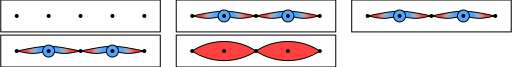

In [ ]:
c.diagram('detslice-svg')

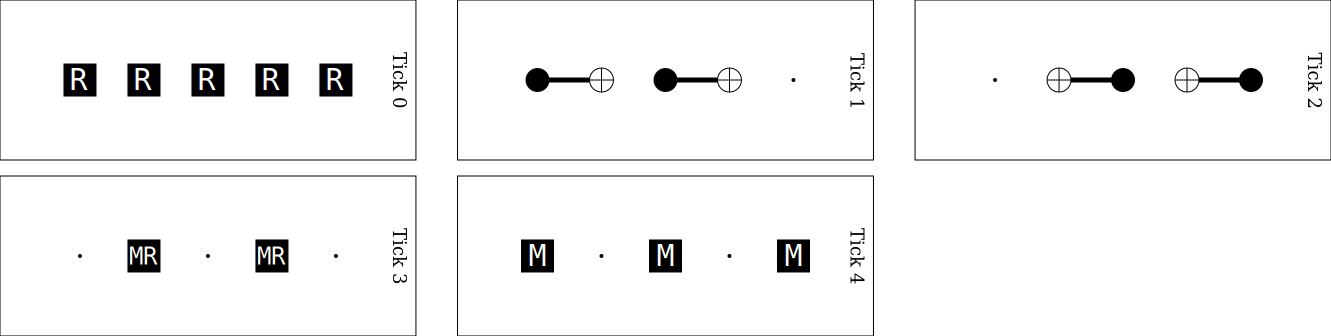

In [ ]:
c.diagram('timeslice-svg')

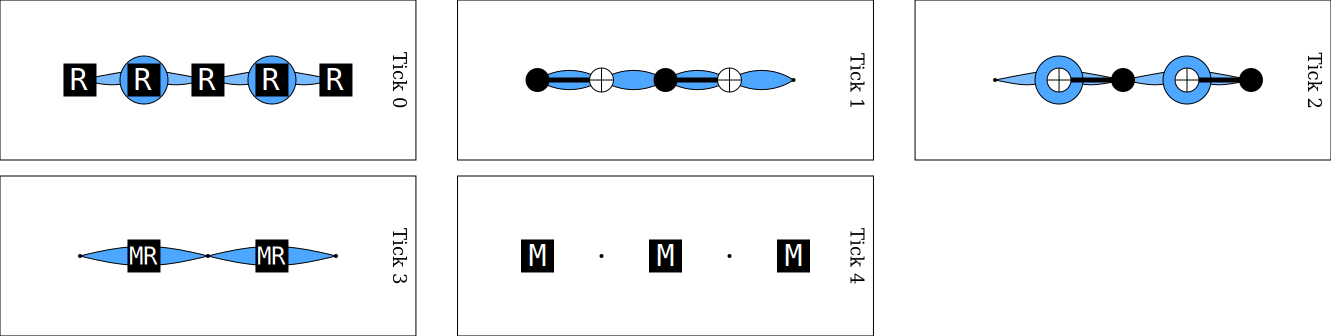

In [ ]:
c.diagram('detslice-with-ops-svg')

# [9, 1, 3] Shor code

In [25]:
def gen_shor(rnds=2):
    c = stim.Circuit()
    for i in range(9):
        c.append("QUBIT_COORDS", [i], [i % 3, i // 3])

    # 9-14 check bit-flips (ZZ checks) within blocks
    # 15-16 check phase-flips (XXX XXX checks) between blocks
    aq_coords = {
        9: (0.5, 0), 10: (1.5, 0),  # Block 1 bit-flip checks
        11: (0.5, 1), 12: (1.5, 1), # Block 2 bit-flip checks
        13: (0.5, 2), 14: (1.5, 2), # Block 3 bit-flip checks
        15: (1, 0.5), 16: (1, 1.5)  # Phase-flip checks between blocks
    }
    for q, pos in aq_coords.items():
        c.append("QUBIT_COORDS", [q], pos)

    c.append('R', range(9))
    c.append('TICK')
    c.append('R', range(9, 15))
    c.append('TICK')
    c.append('R', range(15, 17))
    c.append('TICK')

    for r in range(rnds):
        # Bit-flip checks (Z-stabilizers)
        # blocks: [0,1,2], [3,4,5], [6,7,8]
        z_checks = [(0,1,9), (1,2,10), (3,4,11), (4,5,12), (6,7,13), (7,8,14)]
        for q1, q2, anc in z_checks:
            c.append("CX", [q1, anc])
            c.append("CX", [q2, anc])
        c.append("TICK")

        c.append("MR", range(9, 15))
        for i in range(6):
            if r == 0:
                c.append('DETECTOR', [stim.target_rec(-6 + i)], [*aq_coords[9+i], r])
            else:
                c.append('DETECTOR', [stim.target_rec(-6 + i), stim.target_rec(-14 + i)], [*aq_coords[9+i], r])
        c.append("TICK")

        # Phase-flip checks (X-stabilizers)
        c.append("H", [15, 16])
        c.append("TICK")
        # Block 1 vs Block 2    X1 X2 X3 X4 X5 X6
        for i in range(6): # Qubits 0-5
            c.append("CX", [15, i])
        # Block 2 vs Block 3    X4 X5 X6 X7 X8 X9
        c.append("TICK")
        for i in range(3, 9): # Qubits 3-8
            c.append("CX", [16, i])
        c.append("TICK")
        c.append("H", [15, 16])
        c.append("TICK")

        c.append("MR", [15, 16])
        if r > 0:
            for i in range(2):
                c.append('DETECTOR', [stim.target_rec(-2 + i), stim.target_rec(-10 + i)], [*aq_coords[15+i], r])
        c.append("TICK")

    # Logical Z
    c.append('M', range(9))
    for i, (q1, q2, ai) in enumerate(z_checks):
        c.append('DETECTOR',
            [stim.target_rec(q1 - 9), stim.target_rec(q2 - 9), stim.target_rec(ai - 26)], [*aq_coords[9+i], r])
    c.append('OBSERVABLE_INCLUDE', [stim.target_rec(-i) for i in range(1, 10)], 0)

    return c

shor = gen_shor()
print(shor.to_crumble_url())
shor

https://algassert.com/crumble#circuit=Q(0,0)0;Q(1,0)1;Q(2,0)2;Q(0,1)3;Q(1,1)4;Q(2,1)5;Q(0,2)6;Q(1,2)7;Q(2,2)8;Q(0.5,0)9;Q(1.5,0)10;Q(0.5,1)11;Q(1.5,1)12;Q(0.5,2)13;Q(1.5,2)14;Q(1,0.5)15;Q(1,1.5)16;R_0_1_2_3_4_5_6_7_8;TICK;R_9_10_11_12_13_14;TICK;R_15_16;TICK;CX_0_9_1_9_1_10_2_10_3_11_4_11_4_12_5_12_6_13_7_13_7_14_8_14;TICK;MR_9_10_11_12_13_14;DT(0.5,0,0)rec[-6];DT(1.5,0,0)rec[-5];DT(0.5,1,0)rec[-4];DT(1.5,1,0)rec[-3];DT(0.5,2,0)rec[-2];DT(1.5,2,0)rec[-1];TICK;H_15_16;TICK;CX_15_0_15_1_15_2_15_3_15_4_15_5;TICK;CX_16_3_16_4_16_5_16_6_16_7_16_8;TICK;H_15_16;TICK;MR_15_16;TICK;CX_0_9_1_9_1_10_2_10_3_11_4_11_4_12_5_12_6_13_7_13_7_14_8_14;TICK;MR_9_10_11_12_13_14;DT(0.5,0,1)rec[-6]_rec[-14];DT(1.5,0,1)rec[-5]_rec[-13];DT(0.5,1,1)rec[-4]_rec[-12];DT(1.5,1,1)rec[-3]_rec[-11];DT(0.5,2,1)rec[-2]_rec[-10];DT(1.5,2,1)rec[-1]_rec[-9];TICK;H_15_16;TICK;CX_15_0_15_1_15_2_15_3_15_4_15_5;TICK;CX_16_3_16_4_16_5_16_6_16_7_16_8;TICK;H_15_16;TICK;MR_15_16;DT(1,0.5,1)rec[-2]_rec[-10];DT(1,1.5,1)rec[-1]_rec[

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(1, 0) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(0, 1) 3
    QUBIT_COORDS(1, 1) 4
    QUBIT_COORDS(2, 1) 5
    QUBIT_COORDS(0, 2) 6
    QUBIT_COORDS(1, 2) 7
    QUBIT_COORDS(2, 2) 8
    QUBIT_COORDS(0.5, 0) 9
    QUBIT_COORDS(1.5, 0) 10
    QUBIT_COORDS(0.5, 1) 11
    QUBIT_COORDS(1.5, 1) 12
    QUBIT_COORDS(0.5, 2) 13
    QUBIT_COORDS(1.5, 2) 14
    QUBIT_COORDS(1, 0.5) 15
    QUBIT_COORDS(1, 1.5) 16
    R 0 1 2 3 4 5 6 7 8
    TICK
    R 9 10 11 12 13 14
    TICK
    R 15 16
    TICK
    CX 0 9 1 9 1 10 2 10 3 11 4 11 4 12 5 12 6 13 7 13 7 14 8 14
    TICK
    MR 9 10 11 12 13 14
    DETECTOR(0.5, 0, 0) rec[-6]
    DETECTOR(1.5, 0, 0) rec[-5]
    DETECTOR(0.5, 1, 0) rec[-4]
    DETECTOR(1.5, 1, 0) rec[-3]
    DETECTOR(0.5, 2, 0) rec[-2]
    DETECTOR(1.5, 2, 0) rec[-1]
    TICK
    H 15 16
    TICK
    CX 15 0 15 1 15 2 15 3 15 4 15 5
    TICK
    CX 16 3 16 4 16 5 16 6 16 7 16 8
    TICK
    H 15 16
    TICK
    MR 15 16
   

In [26]:
shor.detector_error_model()

stim.DetectorErrorModel('''
    detector(0.5, 0, 0) D0
    detector(1.5, 0, 0) D1
    detector(0.5, 1, 0) D2
    detector(1.5, 1, 0) D3
    detector(0.5, 2, 0) D4
    detector(1.5, 2, 0) D5
    detector(0.5, 0, 1) D6
    detector(1.5, 0, 1) D7
    detector(0.5, 1, 1) D8
    detector(1.5, 1, 1) D9
    detector(0.5, 2, 1) D10
    detector(1.5, 2, 1) D11
    detector(1, 0.5, 1) D12
    detector(1, 1.5, 1) D13
    detector(0.5, 0, 1) D14
    detector(1.5, 0, 1) D15
    detector(0.5, 1, 1) D16
    detector(1.5, 1, 1) D17
    detector(0.5, 2, 1) D18
    detector(1.5, 2, 1) D19
    logical_observable L0
''')

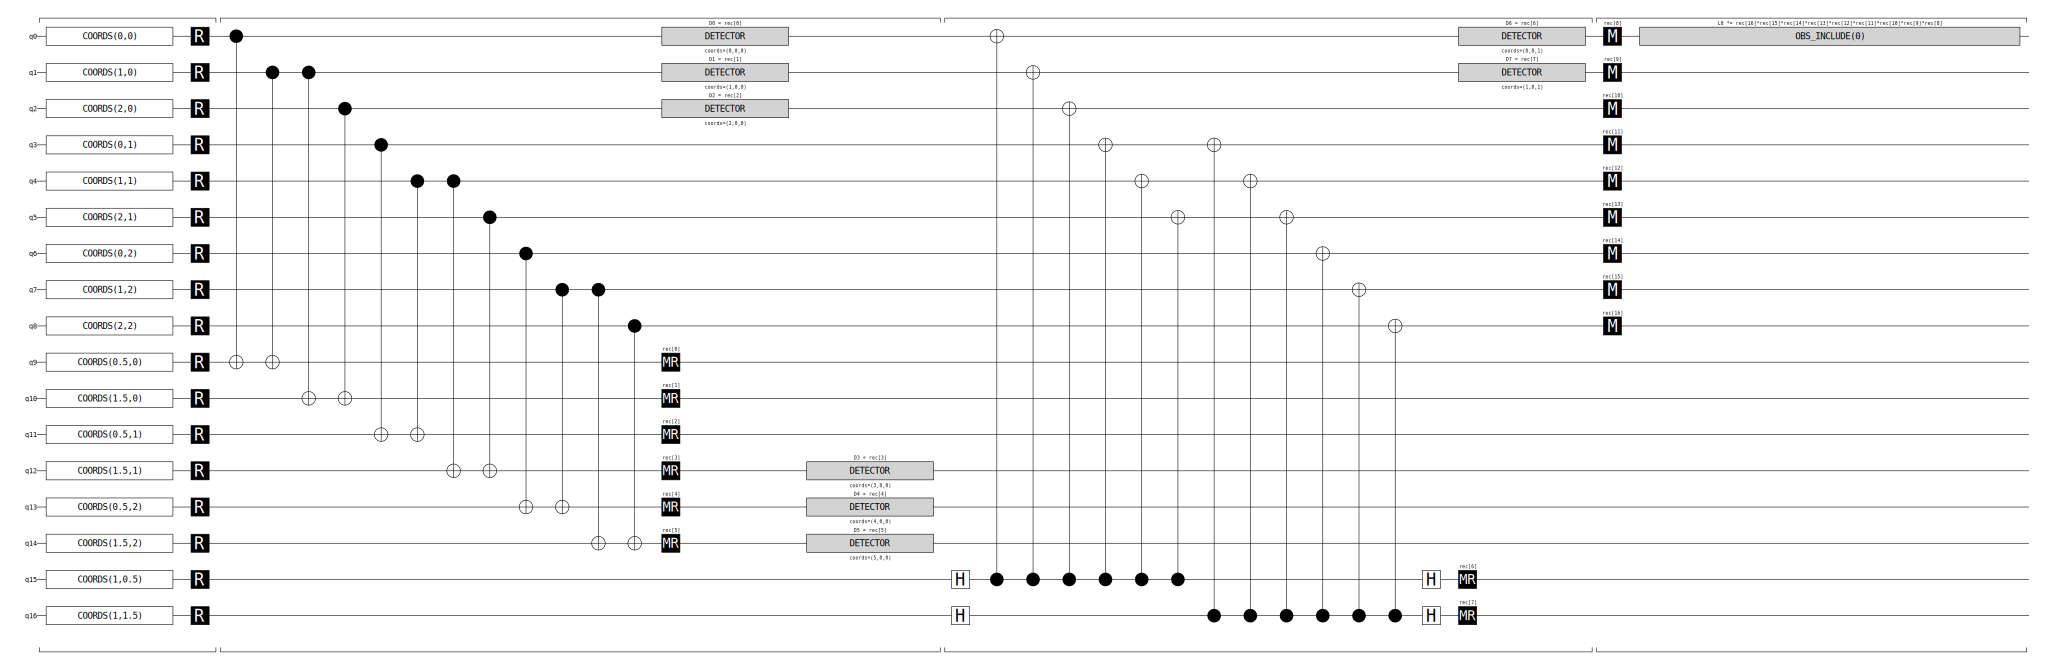

In [9]:
shor.diagram('timeline-svg')

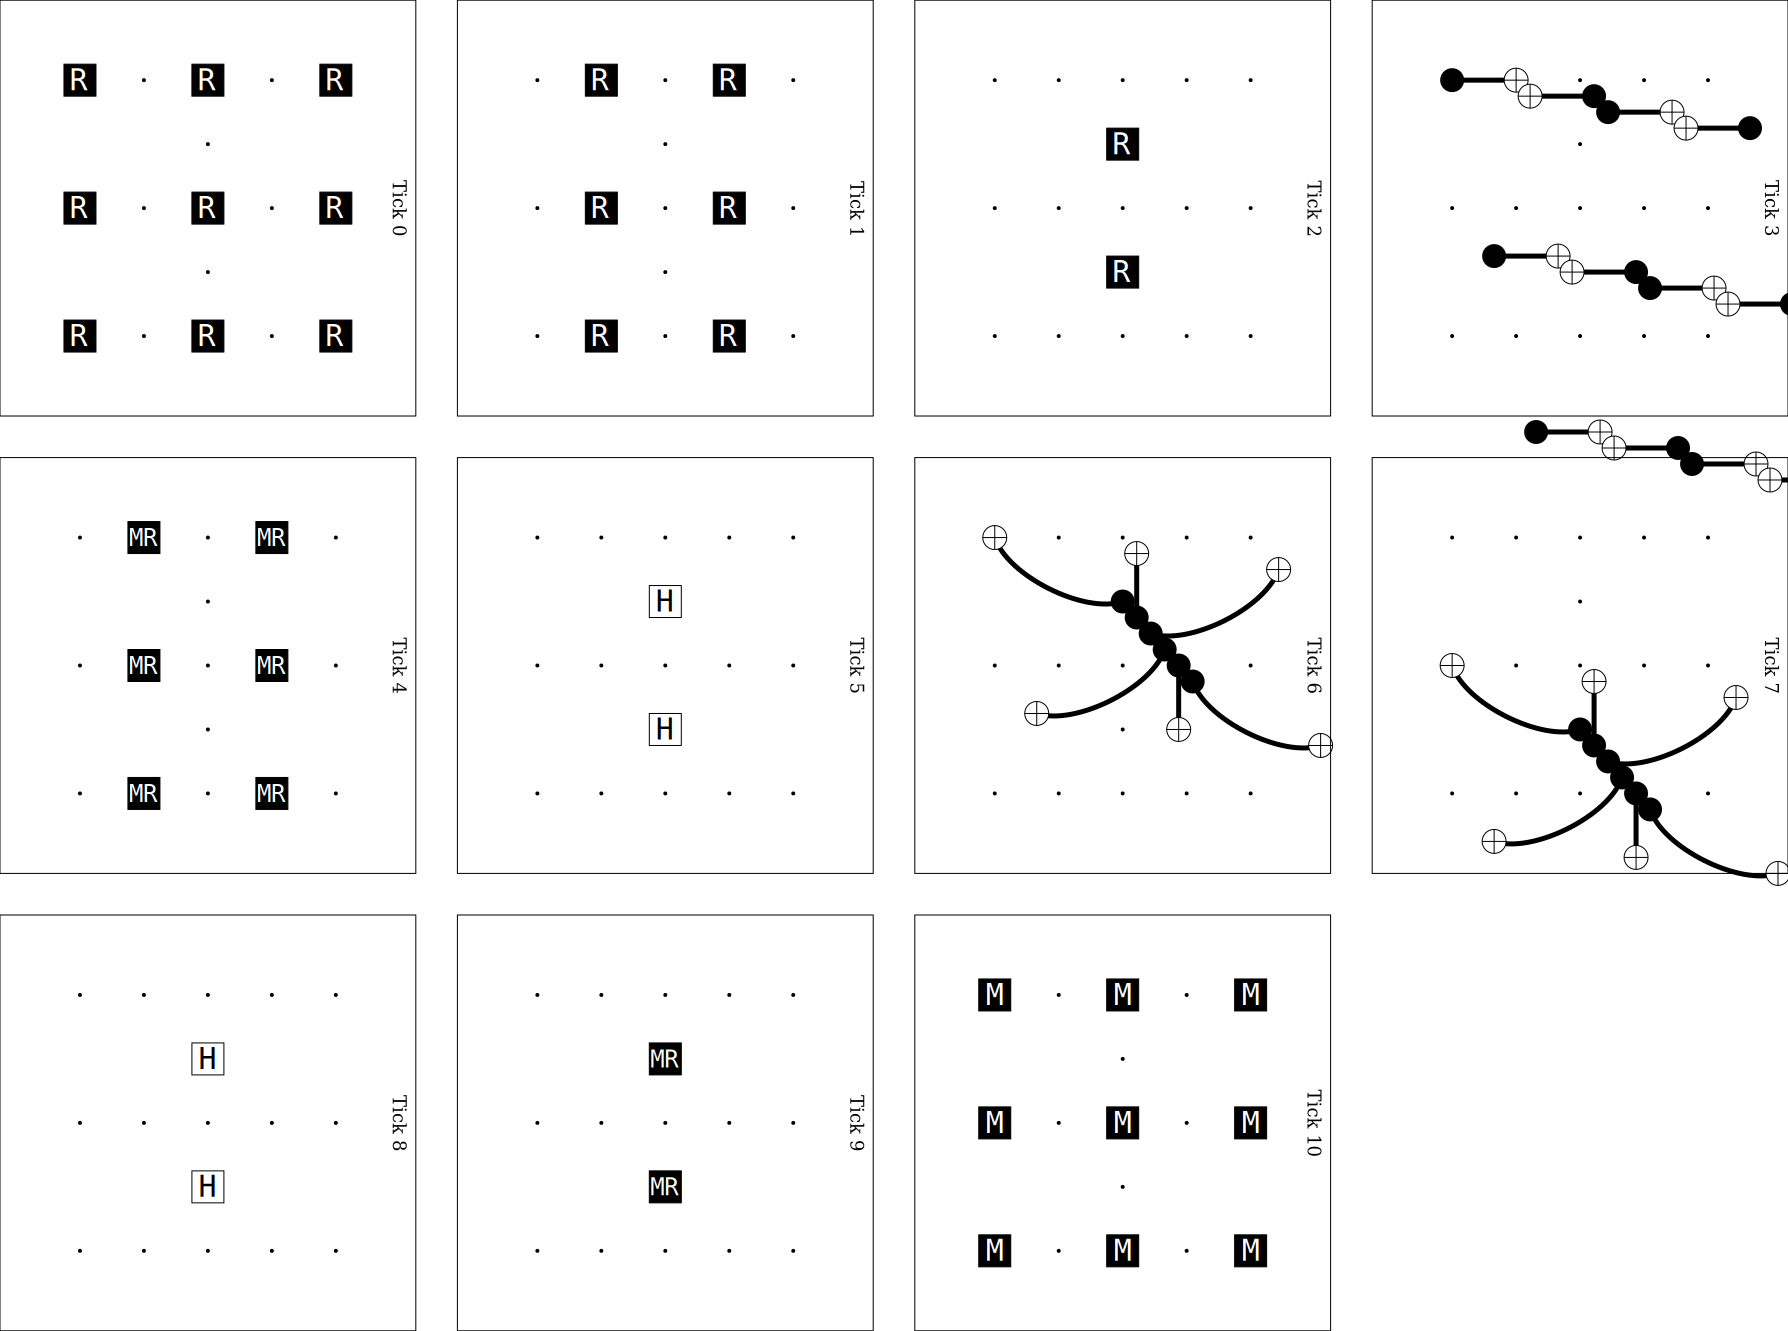

In [12]:
shor.diagram('timeslice-svg')

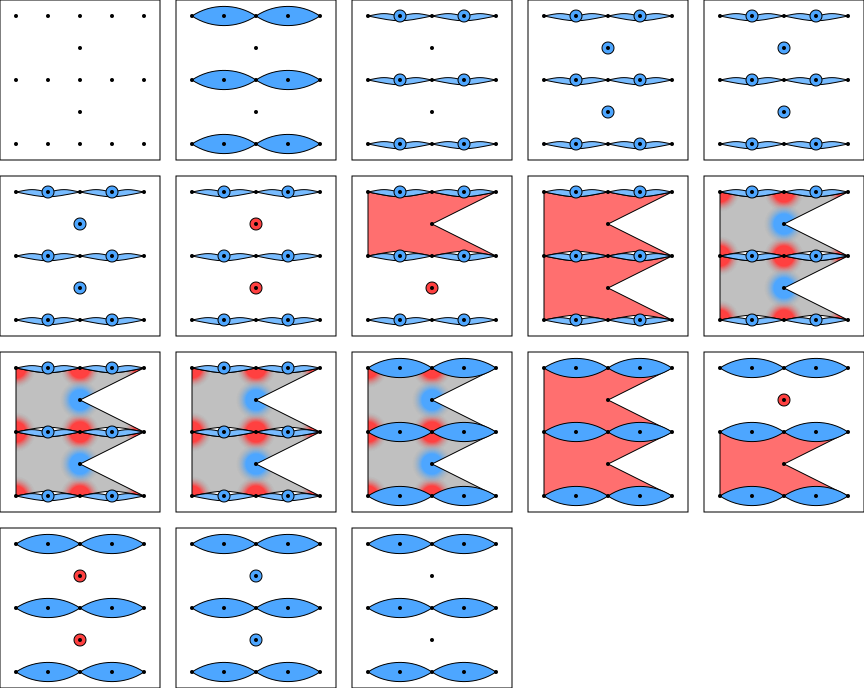

In [28]:
shor.diagram('detslice-svg')

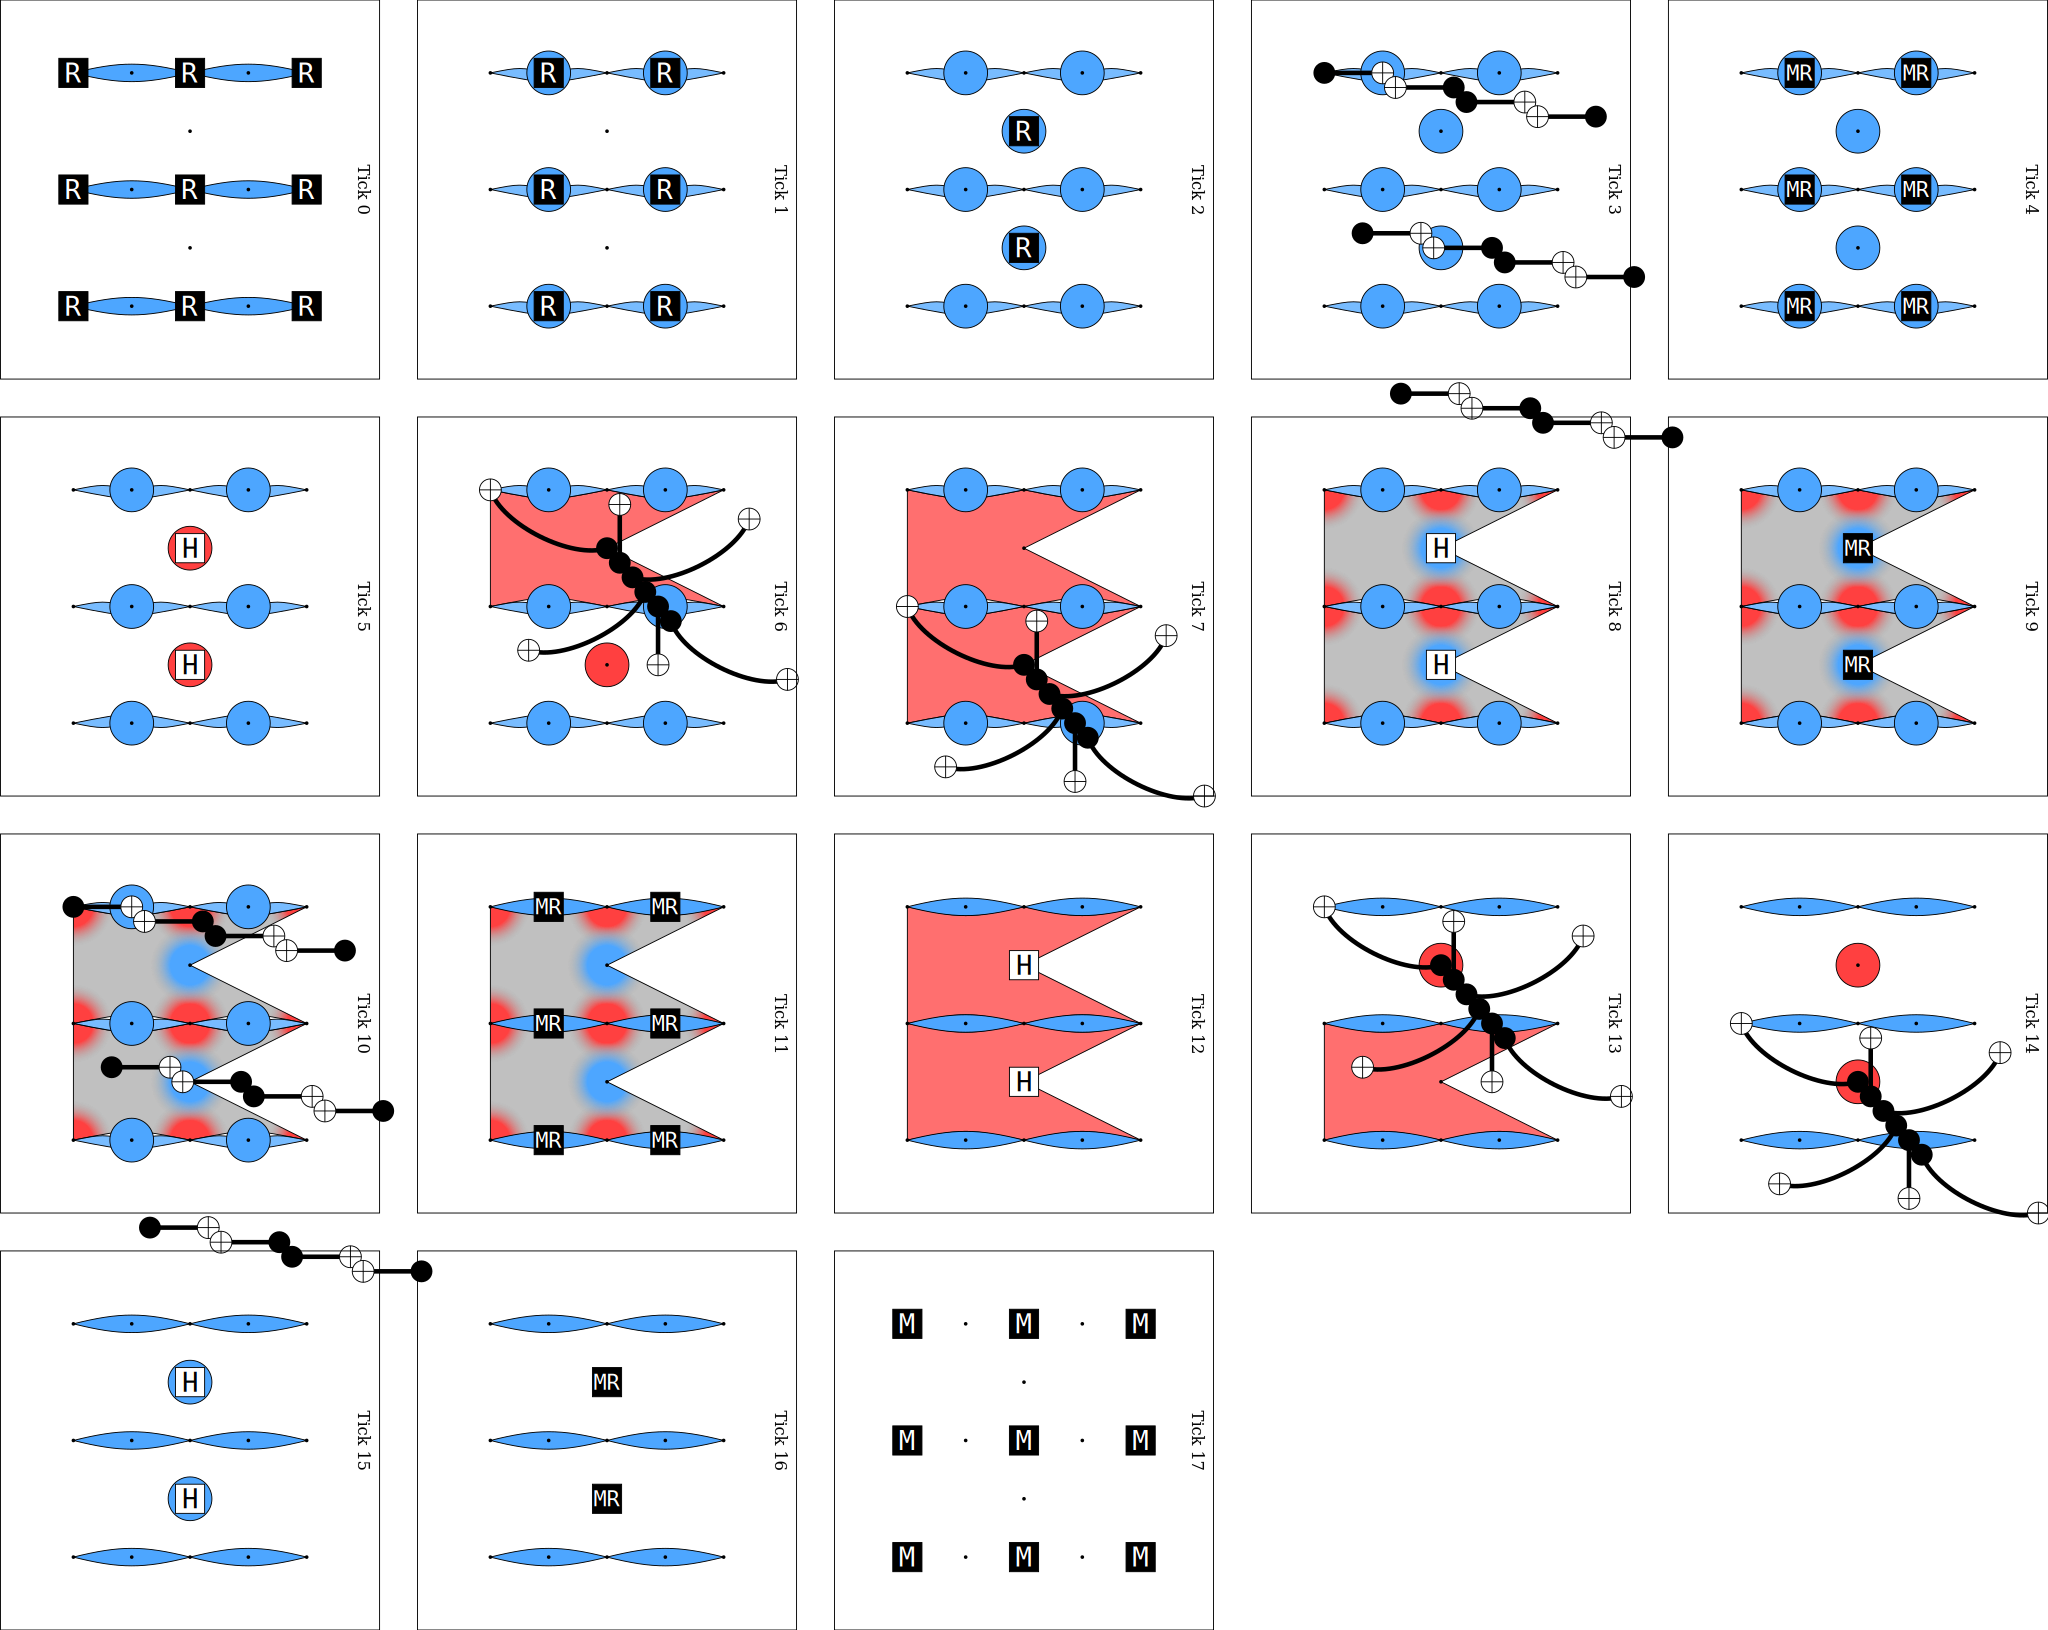

In [27]:
dia = shor.diagram('detslice-with-ops-svg')
with open('dia.svg', 'w') as f:
    f.write(str(dia))
dia

# [7, 1, 3] Steane code

In [ ]:
def gen_steane(d=3, rnds=2):
    c = stim.Circuit()

    # Data Qubits (as you defined)
    coords = {
        0: [2, 0], 1: [1, 2], 2: [2, 2],
        3: [3, 1], 4: [0, 3], 5: [3, 3], 6: [4, 3]
    }

    # Your Trapezoid Stabilizers
    stabs = [
        [0, 1, 2, 3], # Tile 1
        [1, 2, 4, 5], # Tile 2
        [2, 3, 5, 6]  # Tile 3
    ]

    # Calculate Ancilla positions at the barycenter (average) of the 4 qubits
    z_anc_coords = {}
    for i, qubits in enumerate(stabs):
        avg_x = sum(coords[q][0] for q in qubits) / 4
        avg_y = sum(coords[q][1] for q in qubits) / 4
        z_anc_coords[7 + i] = [avg_x, avg_y]

    # X ancillas slightly shifted for clarity in Crumble
    x_anc_coords = {i+3: [pos[0], pos[1] + 0.3] for i, pos in z_anc_coords.items()}

    # Draw triangle
    all_q = {**coords, **z_anc_coords, **x_anc_coords}
    for q, pos in all_q.items():
        c.append("QUBIT_COORDS", [q], pos)

    # Preparation
    c.append('R', range(7))
    #c.append('H', range(7))
    c.append('TICK')
    c.append('R', range(7,10))
    c.append('TICK')
    c.append('R', range(10,13))
    c.append('TICK')

    for r in range(rnds):
        # Z-Stabilizers
        for i, qubits in enumerate(stabs):
            anc = 7 + i
            for q in qubits:
                c.append("CNOT", [q, anc])
            c.append('TICK')

        c.append("MR", range(7, 10))
        if r > 0:
            for i in range(3):
                c.append("DETECTOR", [stim.target_rec(-3 + i), stim.target_rec(-9 + i)], [*z_anc_coords[7+i], r])
        c.append("TICK")

        # X-Stabilizers
        c.append("H", range(10, 13))
        c.append('TICK')
        for i, qubits in enumerate(stabs):
            anc = 10 + i
            for q in qubits:
                c.append("CNOT", [anc, q])
            c.append('TICK')
        c.append("H", range(10, 13))
        c.append('TICK')

        c.append("MR", range(10, 13))
        if r > 0:
            for i in range(3):
                c.append("DETECTOR", [stim.target_rec(-3 + i), stim.target_rec(-9 + i)], [*x_anc_coords[10+i], r])
        c.append("TICK")

    # Measure data qubits
    data_indices = range(7)
    c.append("M", data_indices)
    for i in range(3):
        c.append("DETECTOR", [stim.target_rec(-7 + j) for j in stabs[i]]+[stim.target_rec(-13 + i)], [*z_anc_coords[7+i], r])

    # Logical Z
    c.append("OBSERVABLE_INCLUDE", [stim.target_rec(-i) for i in range(1, 8)], 0)
    return c

steane = gen_steane()
print(steane.to_crumble_url())
steane

https://algassert.com/crumble#circuit=Q(2,0)0;Q(1,2)1;Q(2,2)2;Q(3,1)3;Q(0,3)4;Q(3,3)5;Q(4,3)6;Q(2,1.25)7;Q(1.5,2.5)8;Q(3,2.25)9;Q(2,1.55)10;Q(1.5,2.8)11;Q(3,2.55)12;R_0_1_2_3_4_5_6;TICK;R_7_8_9;TICK;R_10_11_12;TICK;CX_0_7_1_7_2_7_3_7;TICK;CX_1_8_2_8_4_8_5_8;TICK;CX_2_9_3_9_5_9_6_9;TICK;MR_7_8_9;TICK;H_10_11_12;TICK;CX_10_0_10_1_10_2_10_3;TICK;CX_11_1_11_2_11_4_11_5;TICK;CX_12_2_12_3_12_5_12_6;TICK;H_10_11_12;TICK;MR_10_11_12;TICK;CX_0_7_1_7_2_7_3_7;TICK;CX_1_8_2_8_4_8_5_8;TICK;CX_2_9_3_9_5_9_6_9;TICK;MR_7_8_9;DT(2,1.25,1)rec[-3]_rec[-9];DT(1.5,2.5,1)rec[-2]_rec[-8];DT(3,2.25,1)rec[-1]_rec[-7];TICK;H_10_11_12;TICK;CX_10_0_10_1_10_2_10_3;TICK;CX_11_1_11_2_11_4_11_5;TICK;CX_12_2_12_3_12_5_12_6;TICK;H_10_11_12;TICK;MR_10_11_12;DT(2,1.55,1)rec[-3]_rec[-9];DT(1.5,2.8,1)rec[-2]_rec[-8];DT(3,2.55,1)rec[-1]_rec[-7];TICK;M_0_1_2_3_4_5_6;DT(2,1.25,1)rec[-7]_rec[-6]_rec[-5]_rec[-4]_rec[-13];DT(1.5,2.5,1)rec[-6]_rec[-5]_rec[-3]_rec[-2]_rec[-12];DT(3,2.25,1)rec[-5]_rec[-4]_rec[-2]_rec[-1]_rec[-11];O

stim.Circuit('''
    QUBIT_COORDS(2, 0) 0
    QUBIT_COORDS(1, 2) 1
    QUBIT_COORDS(2, 2) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(0, 3) 4
    QUBIT_COORDS(3, 3) 5
    QUBIT_COORDS(4, 3) 6
    QUBIT_COORDS(2, 1.25) 7
    QUBIT_COORDS(1.5, 2.5) 8
    QUBIT_COORDS(3, 2.25) 9
    QUBIT_COORDS(2, 1.55) 10
    QUBIT_COORDS(1.5, 2.8) 11
    QUBIT_COORDS(3, 2.55) 12
    R 0 1 2 3 4 5 6
    TICK
    R 7 8 9
    TICK
    R 10 11 12
    TICK
    CX 0 7 1 7 2 7 3 7
    TICK
    CX 1 8 2 8 4 8 5 8
    TICK
    CX 2 9 3 9 5 9 6 9
    TICK
    MR 7 8 9
    TICK
    H 10 11 12
    TICK
    CX 10 0 10 1 10 2 10 3
    TICK
    CX 11 1 11 2 11 4 11 5
    TICK
    CX 12 2 12 3 12 5 12 6
    TICK
    H 10 11 12
    TICK
    MR 10 11 12
    TICK
    CX 0 7 1 7 2 7 3 7
    TICK
    CX 1 8 2 8 4 8 5 8
    TICK
    CX 2 9 3 9 5 9 6 9
    TICK
    MR 7 8 9
    DETECTOR(2, 1.25, 1) rec[-3] rec[-9]
    DETECTOR(1.5, 2.5, 1) rec[-2] rec[-8]
    DETECTOR(3, 2.25, 1) rec[-1] rec[-7]
    TICK
    H 10 11 12
    T

In [ ]:
steane.detector_error_model()

stim.DetectorErrorModel('''
    detector(2, 1.25, 1) D0
    detector(1.5, 2.5, 1) D1
    detector(3, 2.25, 1) D2
    detector(2, 1.55, 1) D3
    detector(1.5, 2.8, 1) D4
    detector(3, 2.55, 1) D5
    detector(2, 1.25, 1) D6
    detector(1.5, 2.5, 1) D7
    detector(3, 2.25, 1) D8
    logical_observable L0
''')

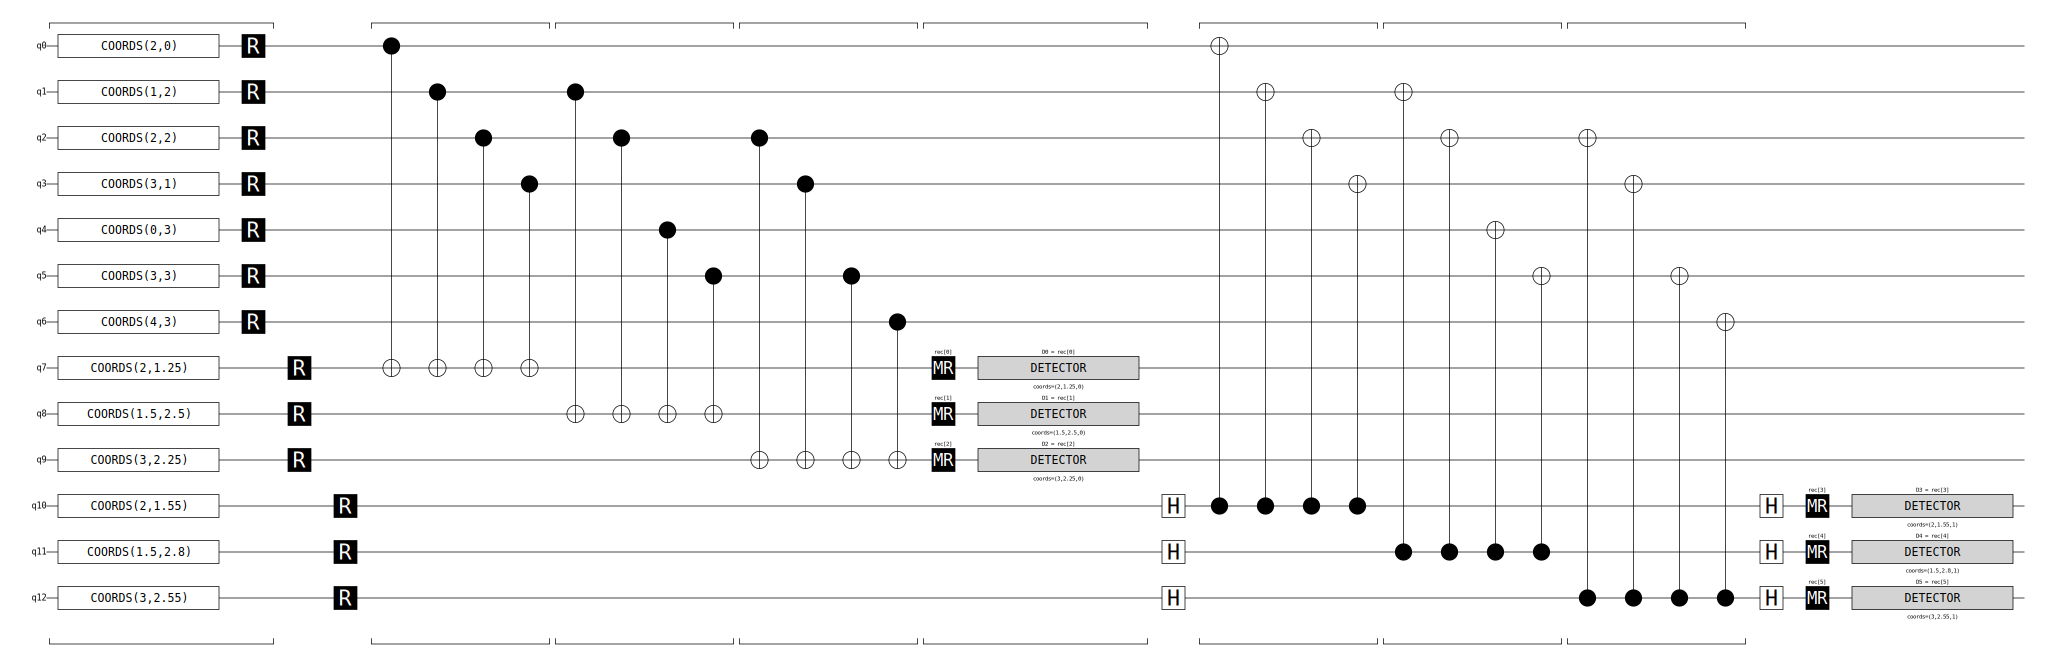

In [ ]:
steane.diagram('timeline-svg')

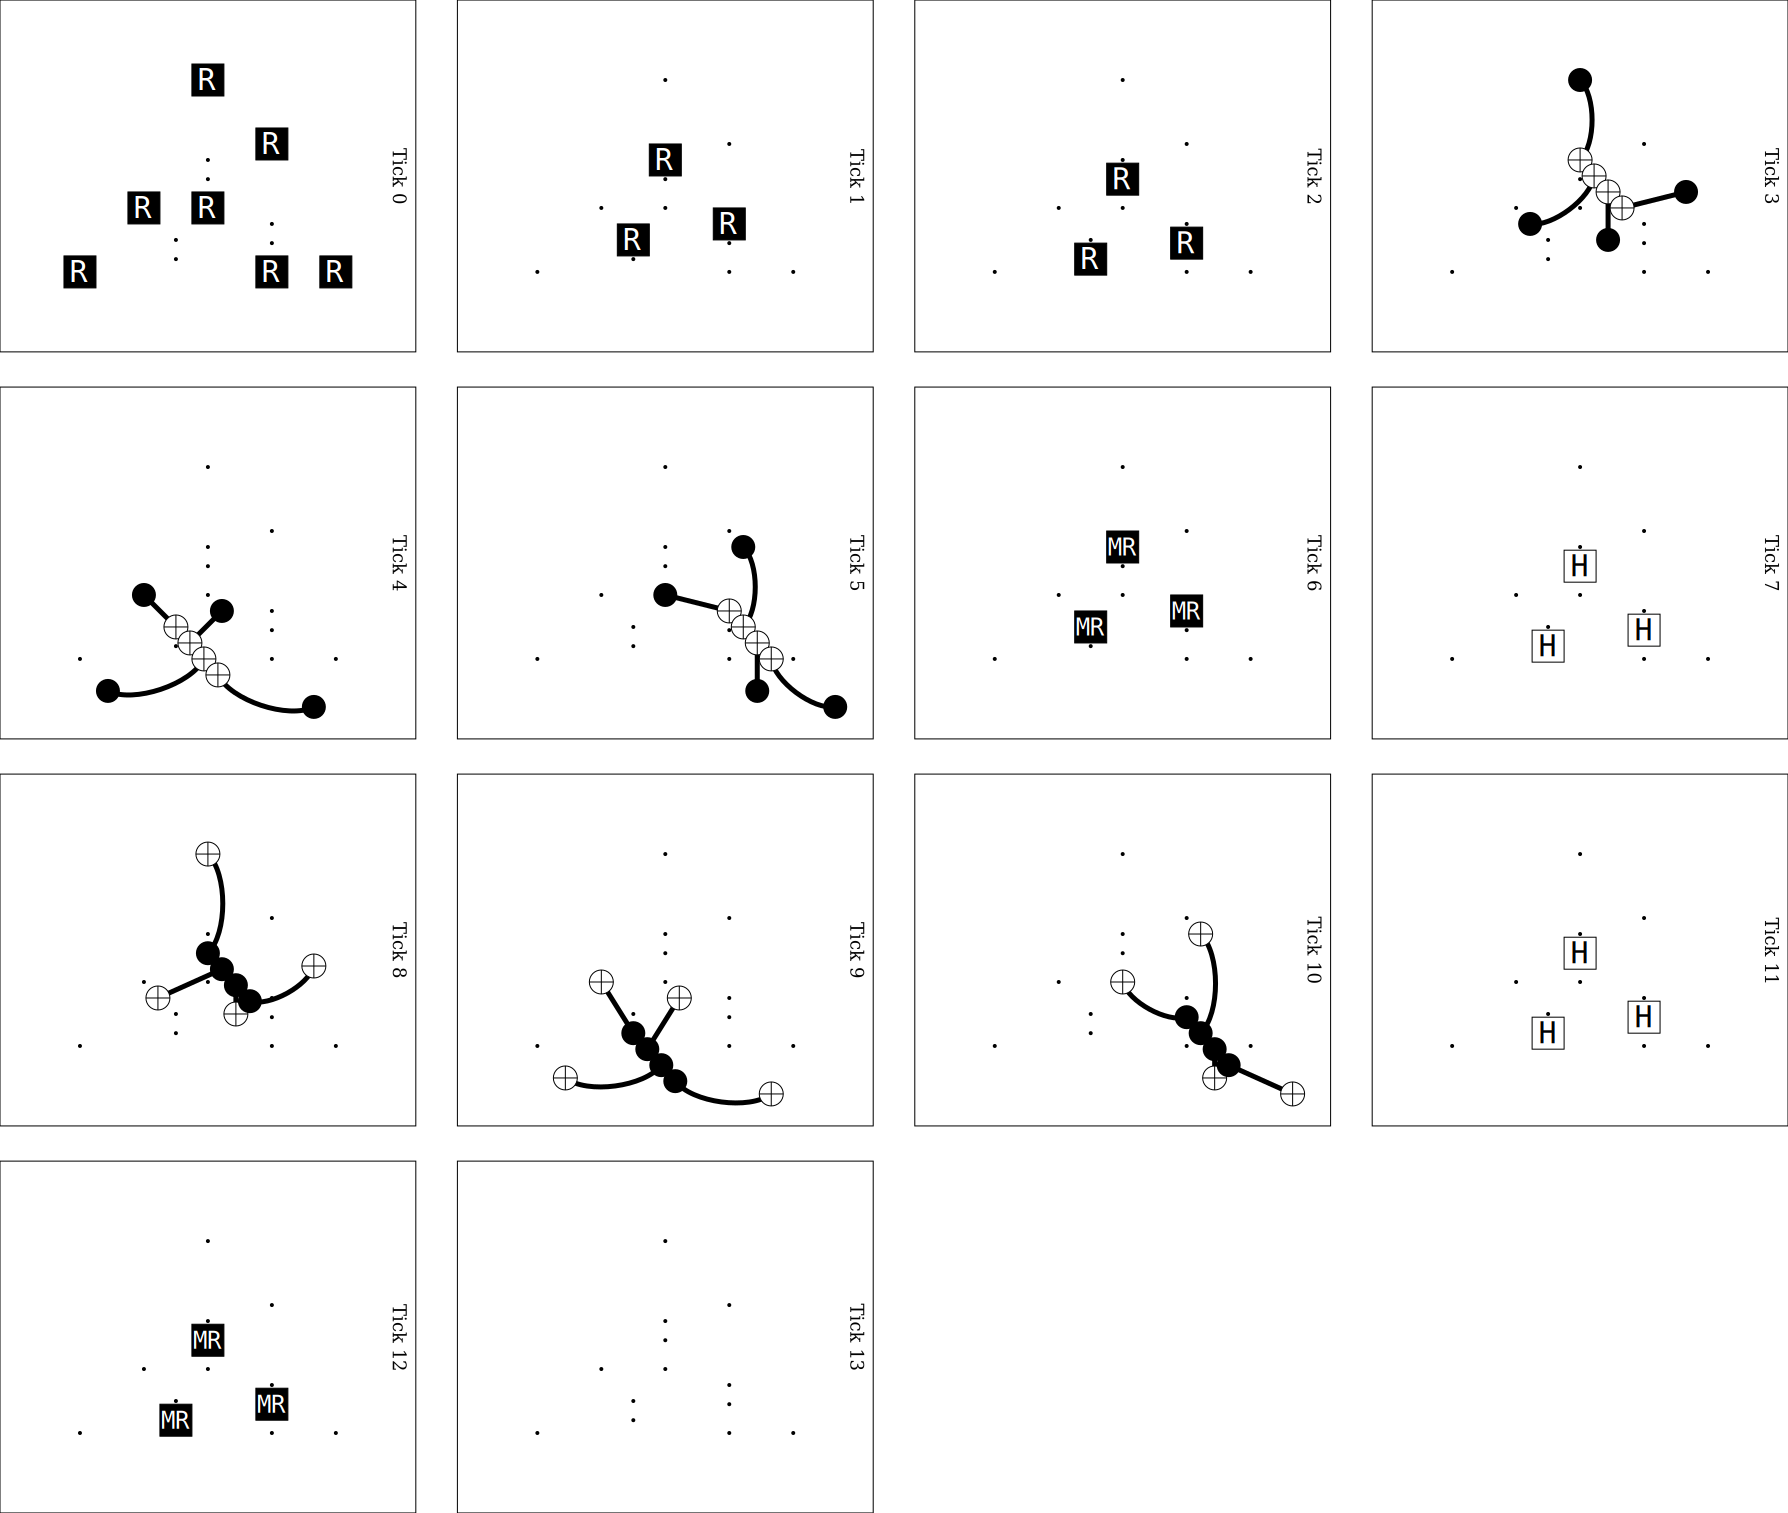

In [ ]:
steane.diagram('timeslice-svg')

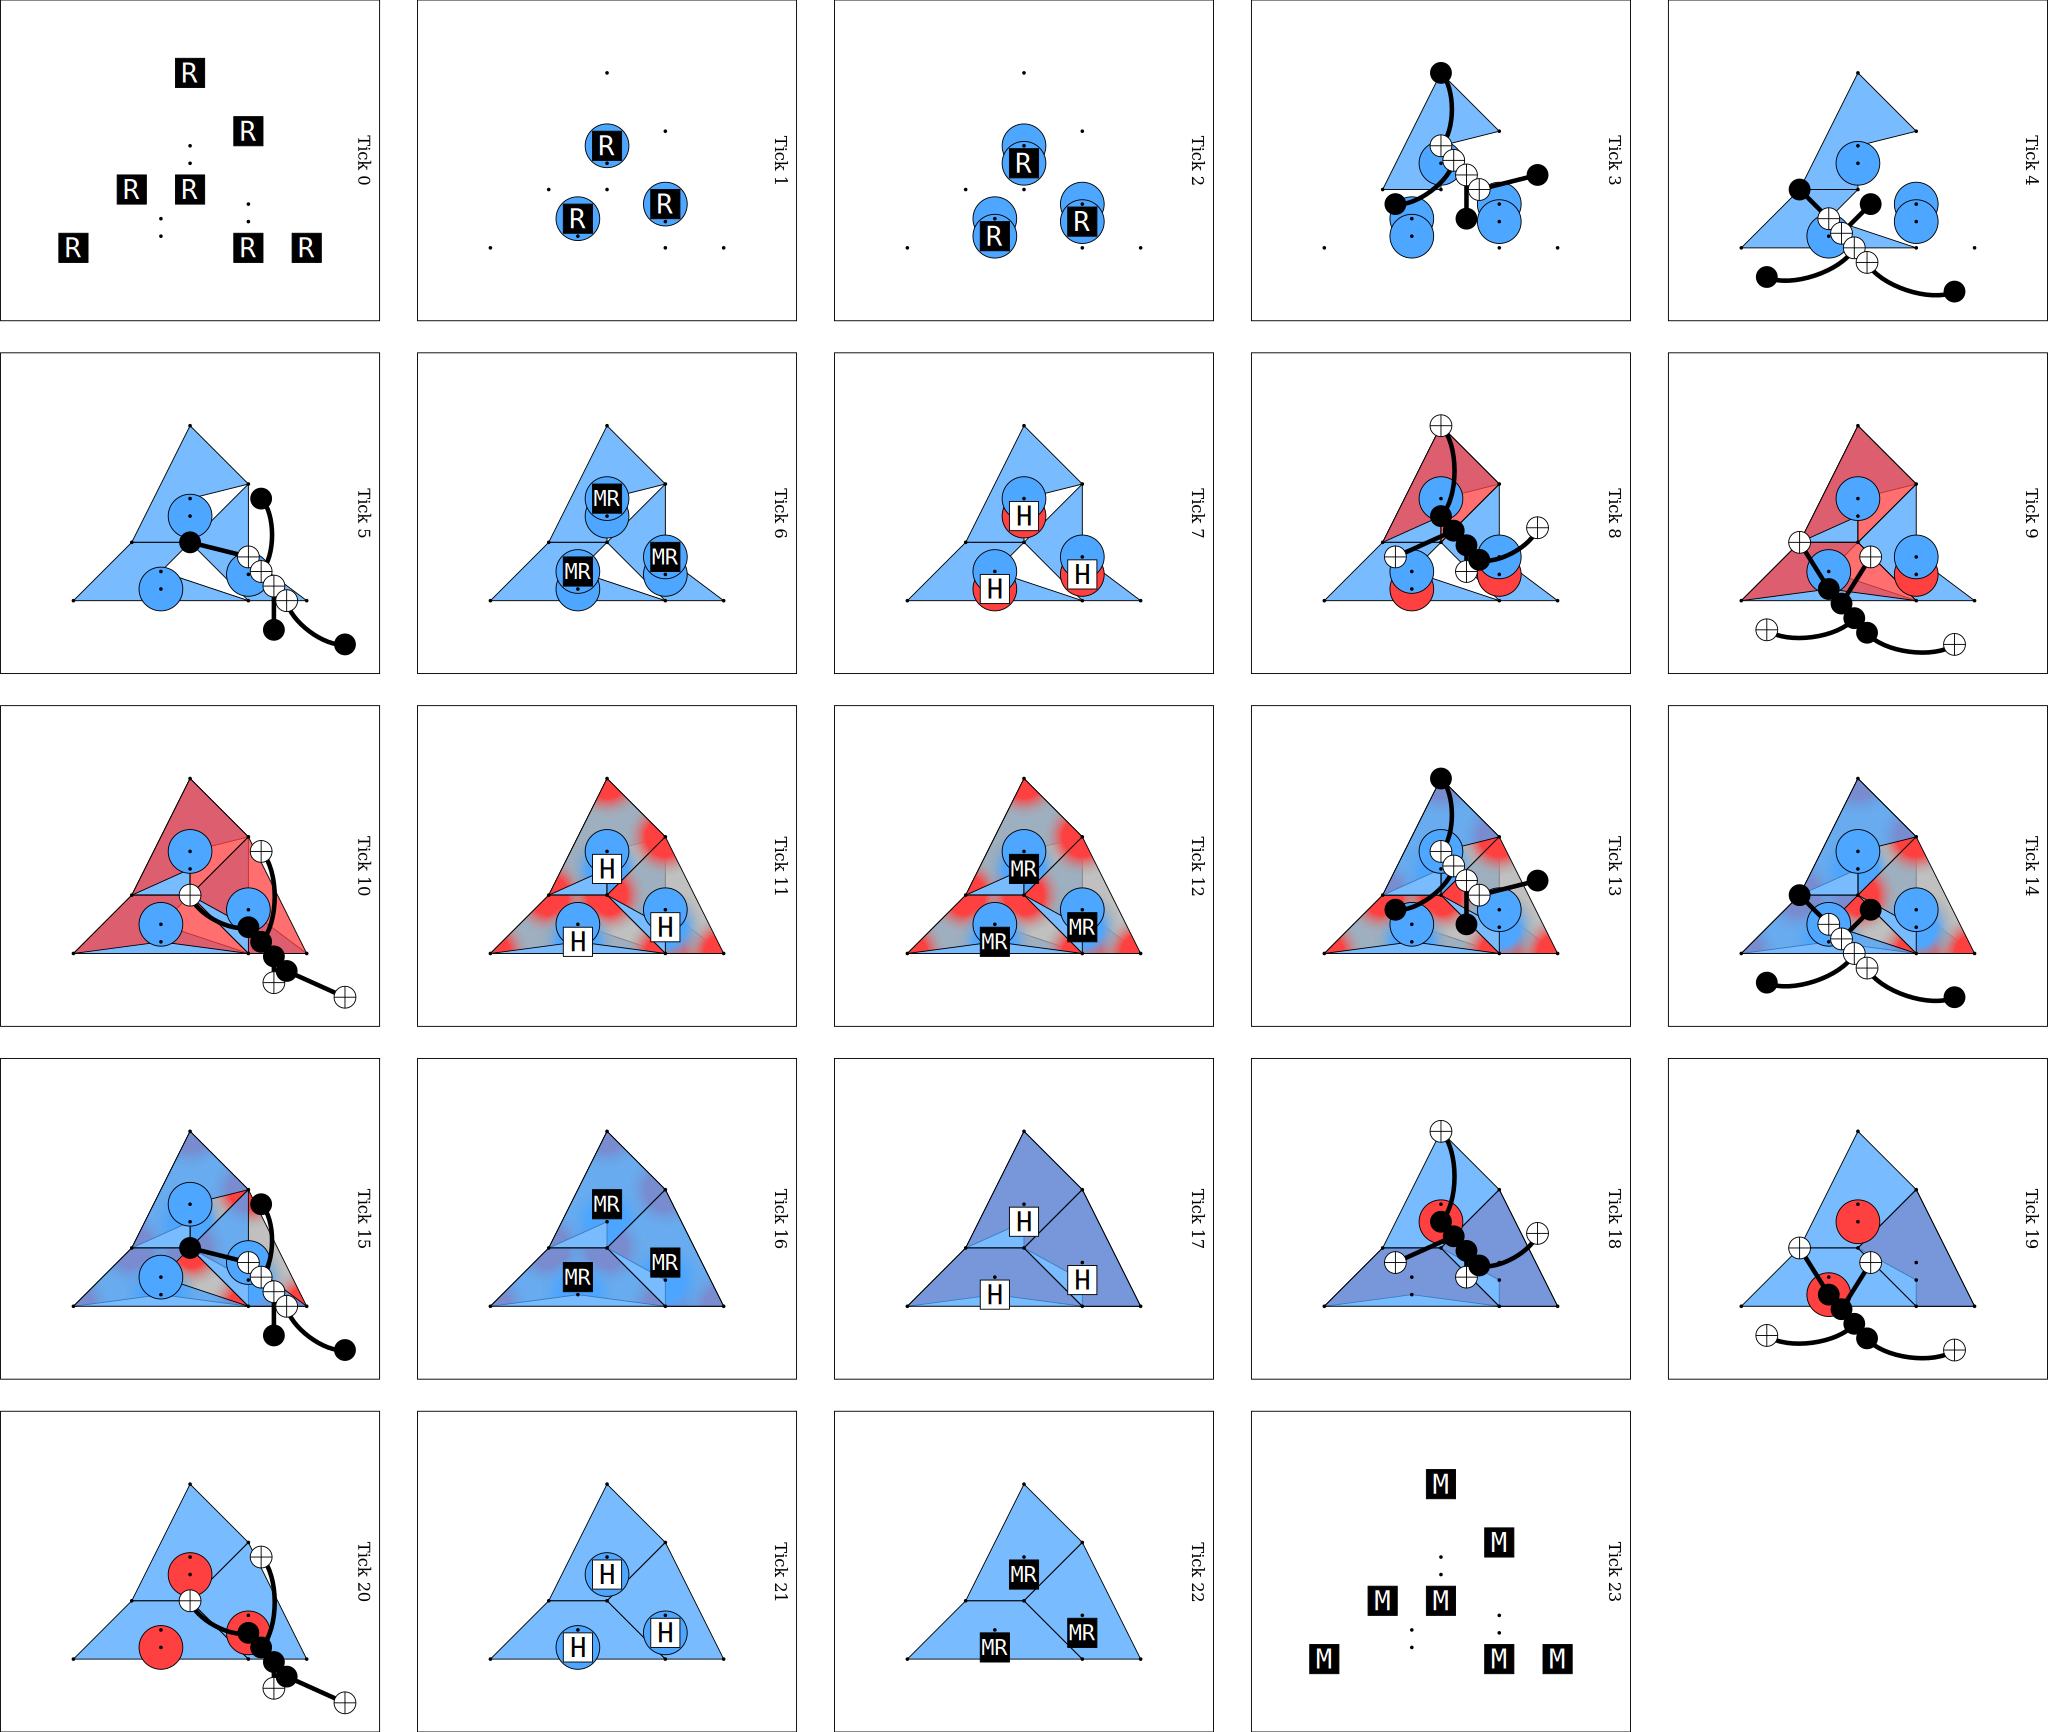

In [ ]:
dia = steane.diagram('detslice-with-ops-svg')
with open('dia.svg', 'w') as f:
    f.write(str(dia))
dia

# Bacon-Shor code

In [ ]:
def gen_bs3():
    c = stim.Circuit()

    # Data Qubit Map (Logical 3x3 on Physical 5x5)
    # Row 0: (0,0), (0,2), (0,4) -> indices 0, 1, 2
    # Row 1: (2,0), (2,2), (2,4) -> indices 3, 4, 5
    # Row 2: (4,0), (4,2), (4,4) -> indices 6, 7, 8
    data_coords = {
        0: [0, 0], 1: [2, 0], 2: [4, 0],
        3: [0, 2], 4: [2, 2], 5: [4, 2],
        6: [0, 4], 7: [2, 4], 8: [4, 4]
    }

    # ZZ Ancilla Map (Horizontal checks between data qubits)
    # Placed at (1,0), (3,0), (1,2), (3,2), (1,4), (3,4)
    zz_anc_coords = {
        9:  [1, 0], 10: [3, 0], # Row 0 checks
        11: [1, 2], 12: [3, 2], # Row 1 checks
        13: [1, 4], 14: [3, 4]  # Row 2 checks
    }

    # XX Ancilla Map (Vertical checks between data qubits)
    # Placed at (0,1), (0,3), (2,1), (2,3), (4,1), (4,3)
    xx_anc_coords = {
        15: [0, 1], 16: [0, 3], # Col 0 checks
        17: [2, 1], 18: [2, 3], # Col 1 checks
        19: [4, 1], 20: [4, 3]  # Col 2 checks
    }

    # Register all coordinates in Stim
    all_coords = {**data_coords, **zz_anc_coords, **xx_anc_coords}
    for q, pos in all_coords.items():
        c.append("QUBIT_COORDS", [q], pos)

    # Preparation
    c.append("R", range(21))
    c.append("TICK")

    # --- ZZ GAUGE CHECKS (Rows) ---
    zz_pairs = [(0,1,9), (1,2,10), (3,4,11), (4,5,12), (6,7,13), (7,8,14)]
    for q1, q2, anc in zz_pairs:
        # Standard Z-basis parity check
        c.append("CNOT", [q1, anc])
        c.append("CNOT", [q2, anc])

    c.append("MR", range(9, 15))
    for i in range(6):
        # Adding coordinates to detectors! [x, y, t]
        # x, y = ancilla position, t = 0 for Z-type
        anc_idx = 9 + i
        c.append("DETECTOR", [stim.target_rec(-6 + i)], [*all_coords[anc_idx], 0])
    c.append("TICK")

    # --- XX GAUGE CHECKS (Columns) ---
    xx_pairs = [(0,3,15), (3,6,16), (1,4,17), (4,7,18), (2,5,19), (5,8,20)]
    c.append("H", range(15, 21))
    for q1, q2, anc in xx_pairs:
        # Standard X-basis parity check (Ancilla as control)
        c.append("CNOT", [anc, q1])
        c.append("CNOT", [anc, q2])

    c.append("H", range(15, 21))
    c.append("MR", range(15, 21))
    for i in range(6):
        # x, y = ancilla position, t = 1 for X-type
        anc_idx = 15 + i
        c.append("DETECTOR", [stim.target_rec(-6 + i)], [*all_coords[anc_idx], 1])
    c.append("TICK")

    # Final Measurement
    c.append("M", range(9))
    c.append("OBSERVABLE_INCLUDE", [stim.target_rec(-i) for i in range(1, 4)], 0)

    return c

bs = gen_bs3()
bs

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(2, 0) 1
    QUBIT_COORDS(4, 0) 2
    QUBIT_COORDS(0, 2) 3
    QUBIT_COORDS(2, 2) 4
    QUBIT_COORDS(4, 2) 5
    QUBIT_COORDS(0, 4) 6
    QUBIT_COORDS(2, 4) 7
    QUBIT_COORDS(4, 4) 8
    QUBIT_COORDS(1, 0) 9
    QUBIT_COORDS(3, 0) 10
    QUBIT_COORDS(1, 2) 11
    QUBIT_COORDS(3, 2) 12
    QUBIT_COORDS(1, 4) 13
    QUBIT_COORDS(3, 4) 14
    QUBIT_COORDS(0, 1) 15
    QUBIT_COORDS(0, 3) 16
    QUBIT_COORDS(2, 1) 17
    QUBIT_COORDS(2, 3) 18
    QUBIT_COORDS(4, 1) 19
    QUBIT_COORDS(4, 3) 20
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    TICK
    CX 0 9 1 9 1 10 2 10 3 11 4 11 4 12 5 12 6 13 7 13 7 14 8 14
    MR 9 10 11 12 13 14
    DETECTOR(1, 0, 0) rec[-6]
    DETECTOR(3, 0, 0) rec[-5]
    DETECTOR(1, 2, 0) rec[-4]
    DETECTOR(3, 2, 0) rec[-3]
    DETECTOR(1, 4, 0) rec[-2]
    DETECTOR(3, 4, 0) rec[-1]
    TICK
    H 15 16 17 18 19 20
    CX 15 0 15 3 16 3 16 6 17 1 17 4 18 4 18 7 19 2 19 5 20 5 20 8
    H 15 1

In [ ]:
bs.detector_error_model()

ValueError: The circuit contains non-deterministic observables.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['L0', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords L0 > output_image.svg

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 20 [coords (4, 3)]

The collapse anti-commuted with these detectors/observables:
    L0

The backward-propagating error sensitivity for L0 was:
    Z6 [coords (0, 4)]
    Z7 [coords (2, 4)]
    Z8 [coords (4, 4)]
    X16 [coords (0, 3)]
    X18 [coords (2, 3)]
    X20 [coords (4, 3)]

Circuit stack trace:
    during TICK layer #1 of 4
    at instruction #22 [which is R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]

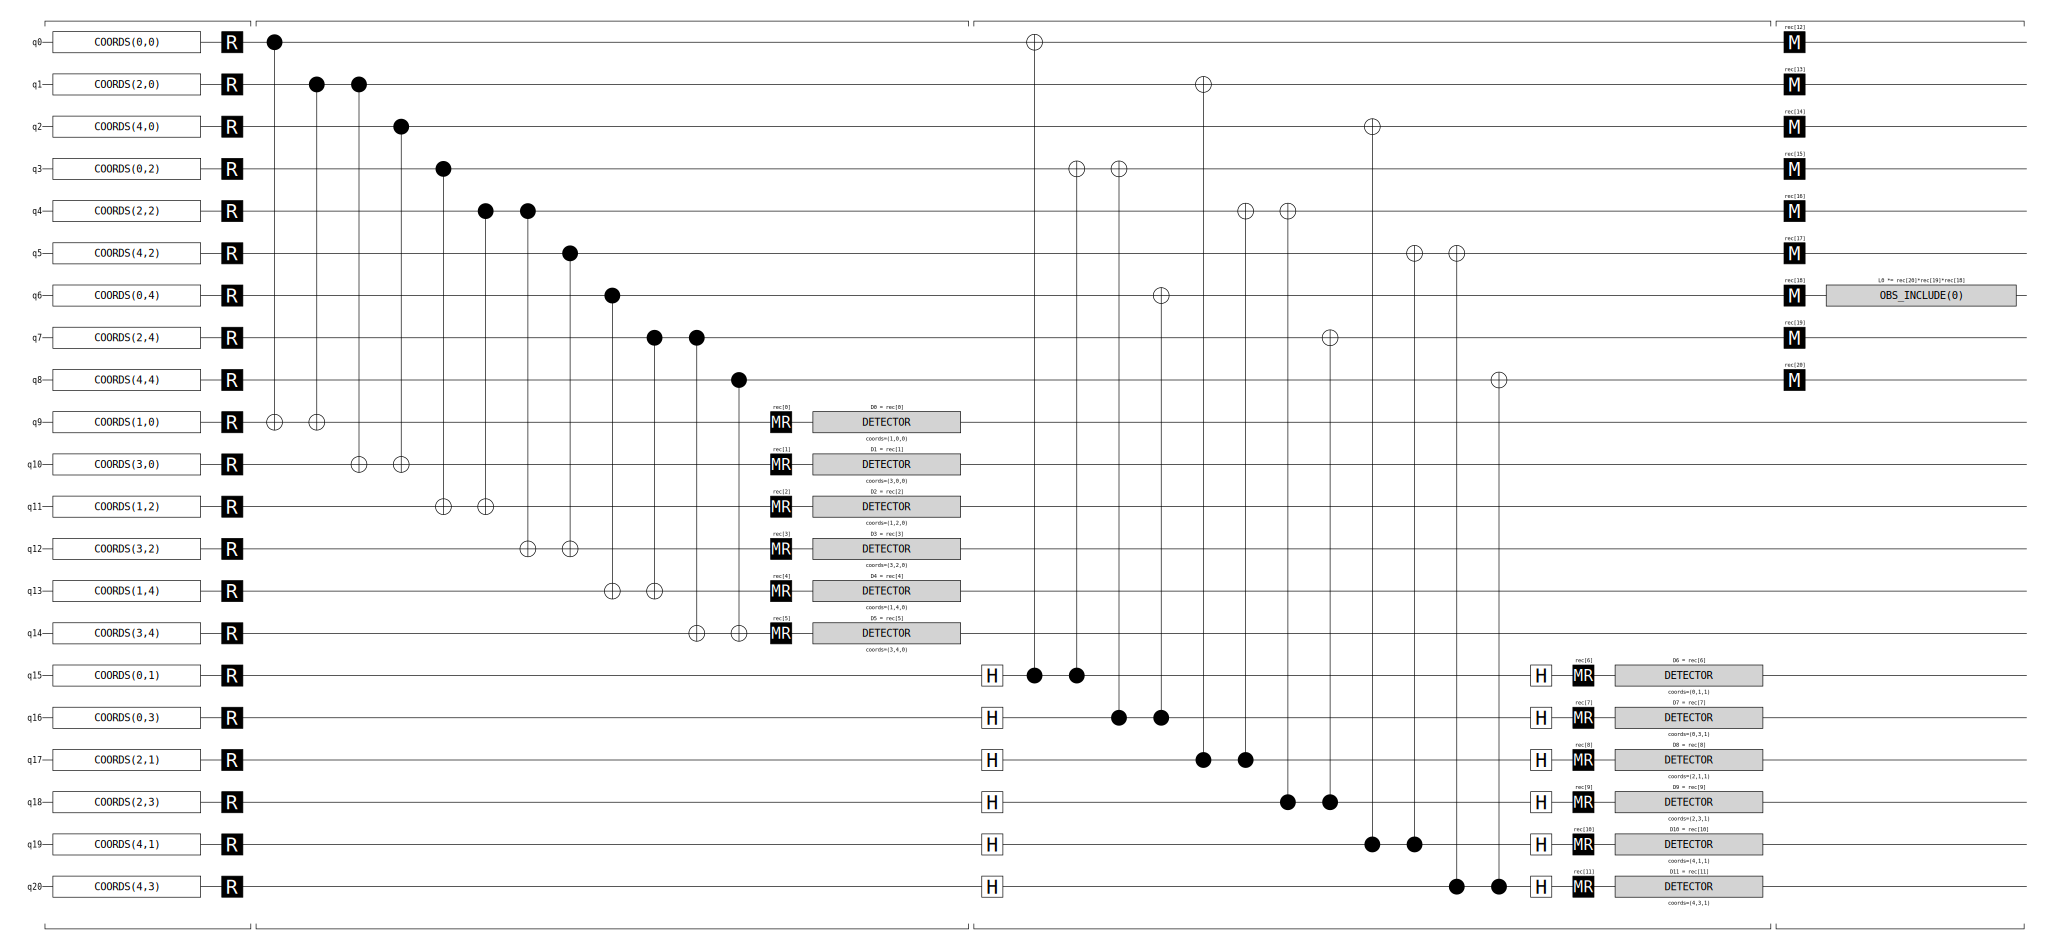

In [ ]:
bs.diagram('timeline-svg')

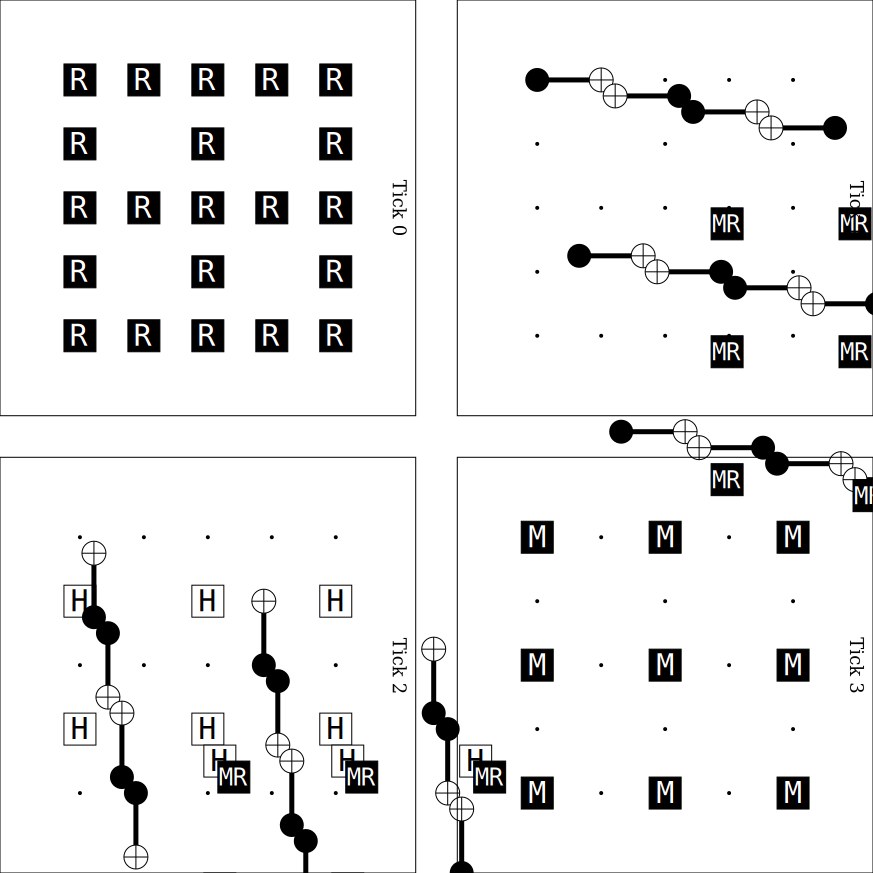

In [ ]:
bs.diagram('timeslice-svg')

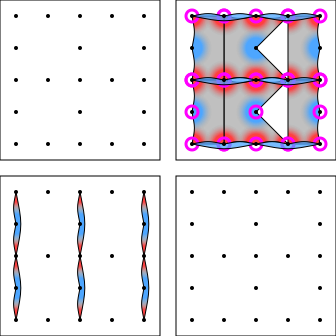

In [ ]:
bs.diagram('detslice-svg')

In [ ]:
def gen_bs(d, r):
    c = stim.Circuit()
    data_q = d**2
    zz_q = d * (d-1)
    xx_q = d * (d-1)

    # 1. Coordinate Registration
    # Data Qubits
    for r_idx in range(d):
        for c_idx in range(d):
            c.append("QUBIT_COORDS", [r_idx*d + c_idx], [c_idx*2, r_idx*2])

    # ZZ Ancillas (Horizontal gutters)
    for i in range(zz_q):
        row, col = divmod(i, d-1)
        c.append("QUBIT_COORDS", [data_q + i], [col*2 + 1, row*2])

    # XX Ancillas (Vertical gutters)
    for i in range(xx_q):
        col, row = divmod(i, d-1)
        c.append("QUBIT_COORDS", [data_q + zz_q + i], [col*2, row*2 + 1])

    c.append("R", range(data_q + zz_q + xx_q))
    c.append("TICK")

    # 2. Measurement Rounds
    for rnd in range(r):
        # --- ZZ GAUGE CHECKS (Rows) ---
        for i in range(zz_q):
            row, col = divmod(i, d-1)
            q1, q2, anc = row*d + col, row*d + col + 1, data_q + i
            c.append("CNOT", [q1, anc])
            c.append("CNOT", [q2, anc])
        c.append("TICK")

        c.append("MR", range(data_q, data_q + zz_q))
        c.append("TICK")

        for i in range(zz_q):
            row, col = divmod(i, d-1)
            # rec[-zz_q + i] is the current measurement
            rec = [stim.target_rec(-zz_q + i)]
            if rnd > 0:
                # Compare to the measurement from exactly one full cycle ago
                # Cycle length = zz_q measurements + xx_q measurements
                rec.append(stim.target_rec(-zz_q + i - (zz_q + xx_q)))
            c.append("DETECTOR", rec, [col*2 + 1, row*2, rnd])
        c.append("TICK")

        # --- XX GAUGE CHECKS (Columns) ---
        xx_anc_start = data_q + zz_q
        c.append("H", range(xx_anc_start, xx_anc_start + xx_q))
        c.append("TICK")

        for i in range(xx_q):
            col, row = divmod(i, d-1)
            # Vertical check: Data(row, col) and Data(row+1, col)
            q1, q2, anc = row*d + col, (row+1)*d + col, xx_anc_start + i
            c.append("CNOT", [anc, q1])
            c.append("CNOT", [anc, q2])
        c.append("TICK")

        c.append("H", range(xx_anc_start, xx_anc_start + xx_q))
        c.append("TICK")
        c.append("MR", range(xx_anc_start, xx_anc_start + xx_q))
        c.append("TICK")

        for i in range(xx_q):
            col, row = divmod(i, d-1)
            rec = [stim.target_rec(-xx_q + i)]
            if rnd > 0:
                rec.append(stim.target_rec(-xx_q + i - (zz_q + xx_q)))
            c.append("DETECTOR", rec, [col*2, row*2 + 1, rnd])
        c.append("TICK")

    # 3. Final Logical Readout
    c.append("M", range(data_q))
    # Logical Z: Parity of the first column
    c.append("OBSERVABLE_INCLUDE", [stim.target_rec(-data_q + i*d) for i in range(d)], 0)

    return c

bs32 = gen_bs(3, 2)
print(shor.to_crumble_url())
bs32

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(2, 0) 1
    QUBIT_COORDS(4, 0) 2
    QUBIT_COORDS(0, 2) 3
    QUBIT_COORDS(2, 2) 4
    QUBIT_COORDS(4, 2) 5
    QUBIT_COORDS(0, 4) 6
    QUBIT_COORDS(2, 4) 7
    QUBIT_COORDS(4, 4) 8
    QUBIT_COORDS(1, 0) 9
    QUBIT_COORDS(3, 0) 10
    QUBIT_COORDS(1, 2) 11
    QUBIT_COORDS(3, 2) 12
    QUBIT_COORDS(1, 4) 13
    QUBIT_COORDS(3, 4) 14
    QUBIT_COORDS(0, 1) 15
    QUBIT_COORDS(0, 3) 16
    QUBIT_COORDS(2, 1) 17
    QUBIT_COORDS(2, 3) 18
    QUBIT_COORDS(4, 1) 19
    QUBIT_COORDS(4, 3) 20
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    TICK
    CX 0 9 1 9 1 10 2 10 3 11 4 11 4 12 5 12 6 13 7 13 7 14 8 14
    TICK
    MR 9 10 11 12 13 14
    TICK
    DETECTOR(1, 0, 0) rec[-6]
    DETECTOR(3, 0, 0) rec[-5]
    DETECTOR(1, 2, 0) rec[-4]
    DETECTOR(3, 2, 0) rec[-3]
    DETECTOR(1, 4, 0) rec[-2]
    DETECTOR(3, 4, 0) rec[-1]
    TICK
    H 15 16 17 18 19 20
    TICK
    CX 15 0 15 3 16 3 16 6 17 1 17 4 18 4 18 7 19 

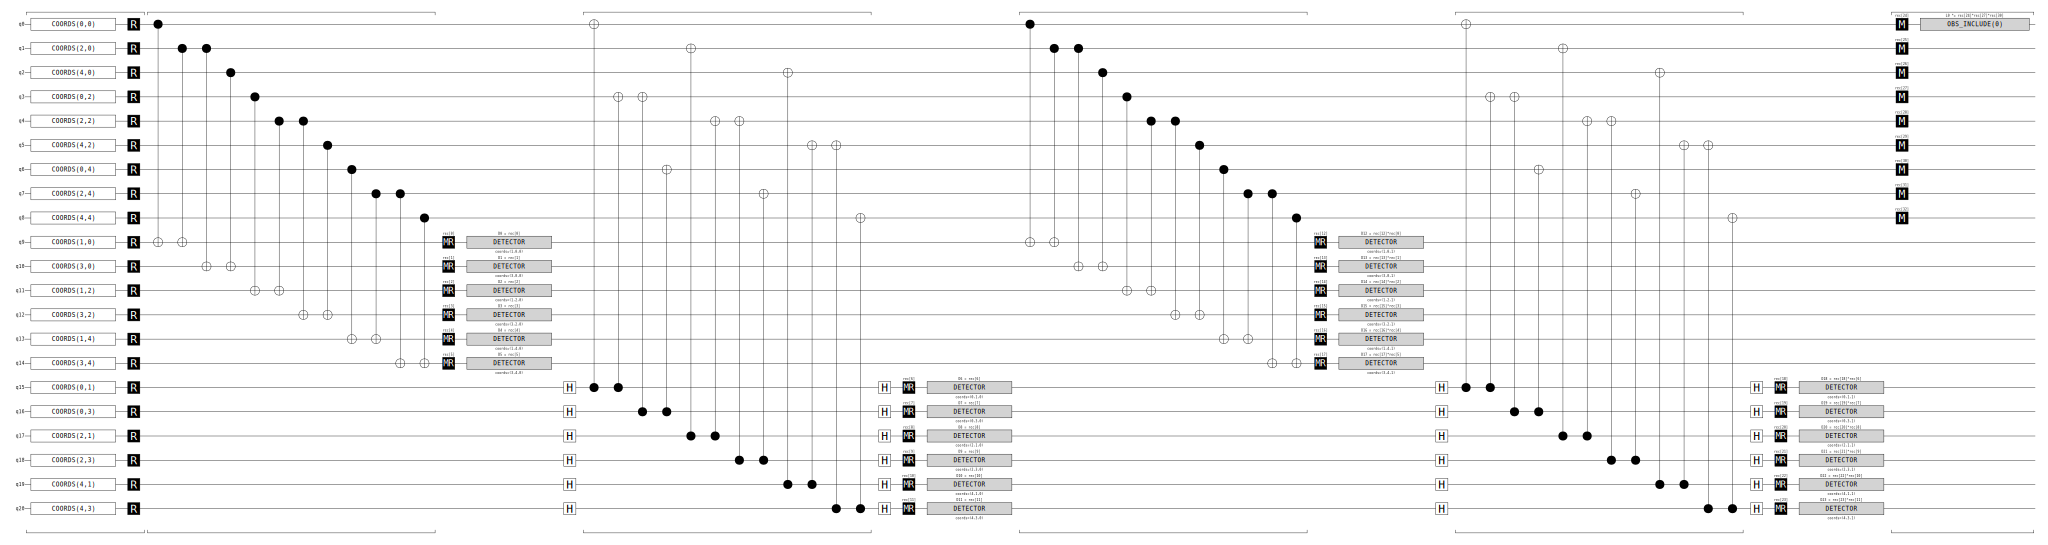

In [ ]:
bs32.diagram('timeline-svg')

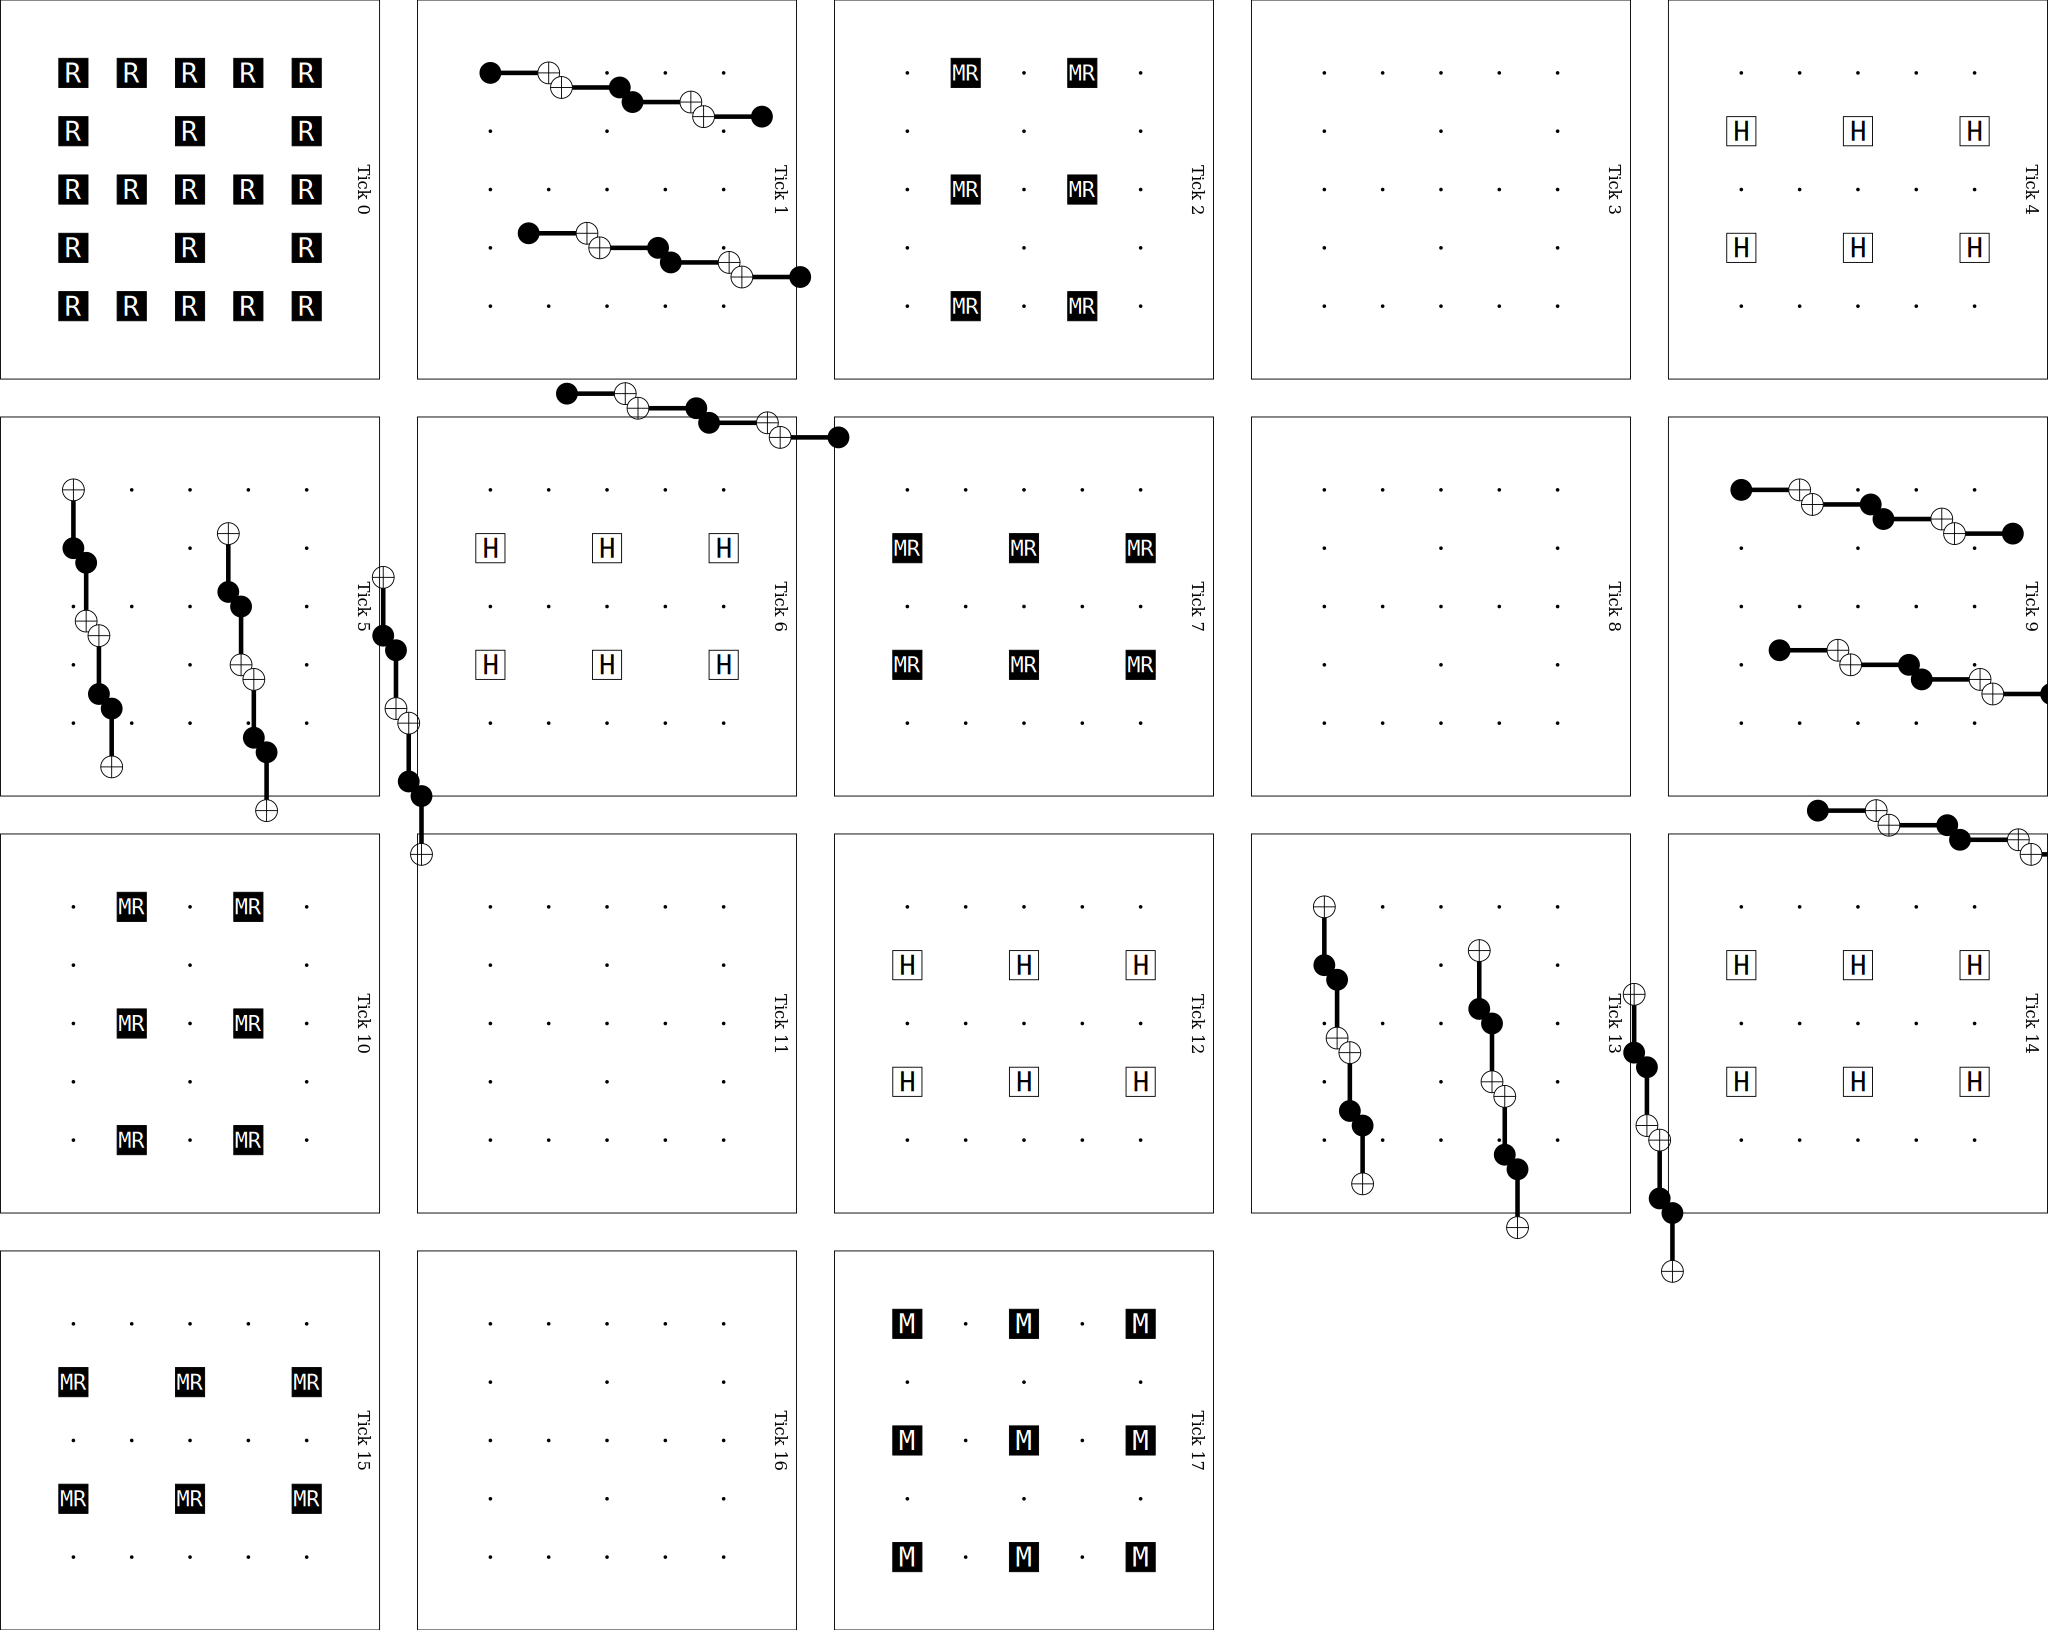

In [ ]:
bs32.diagram('timeslice-svg')

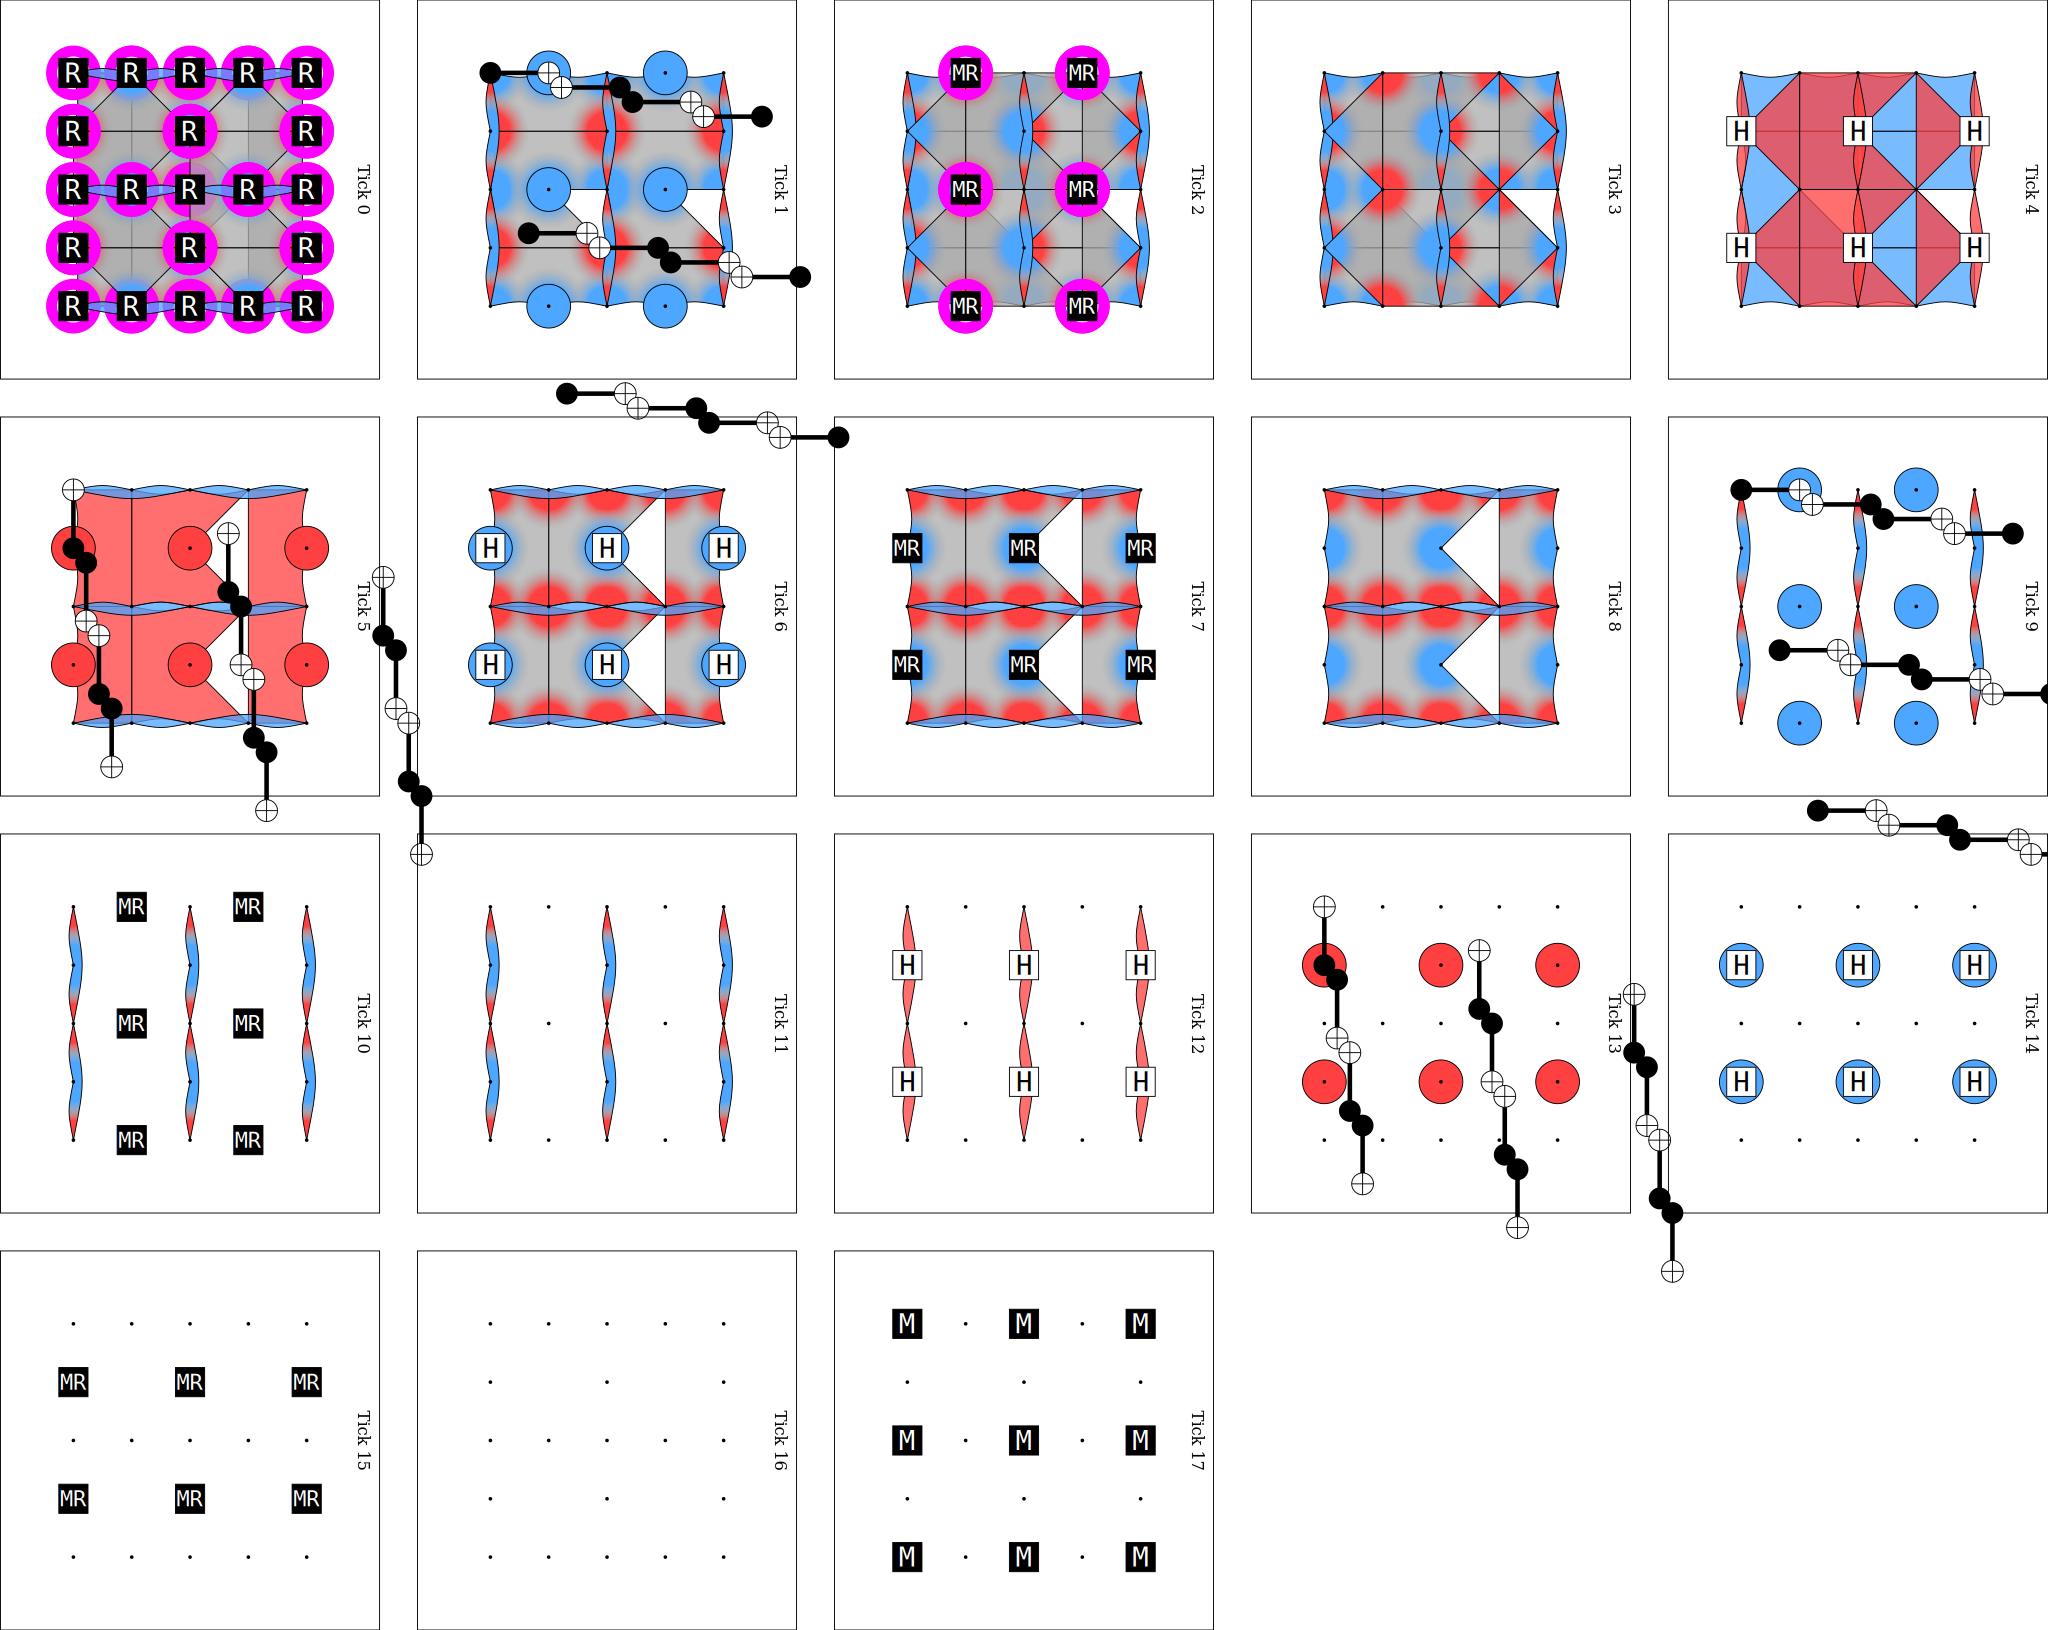

In [ ]:
bs32.diagram('detslice-with-ops-svg')

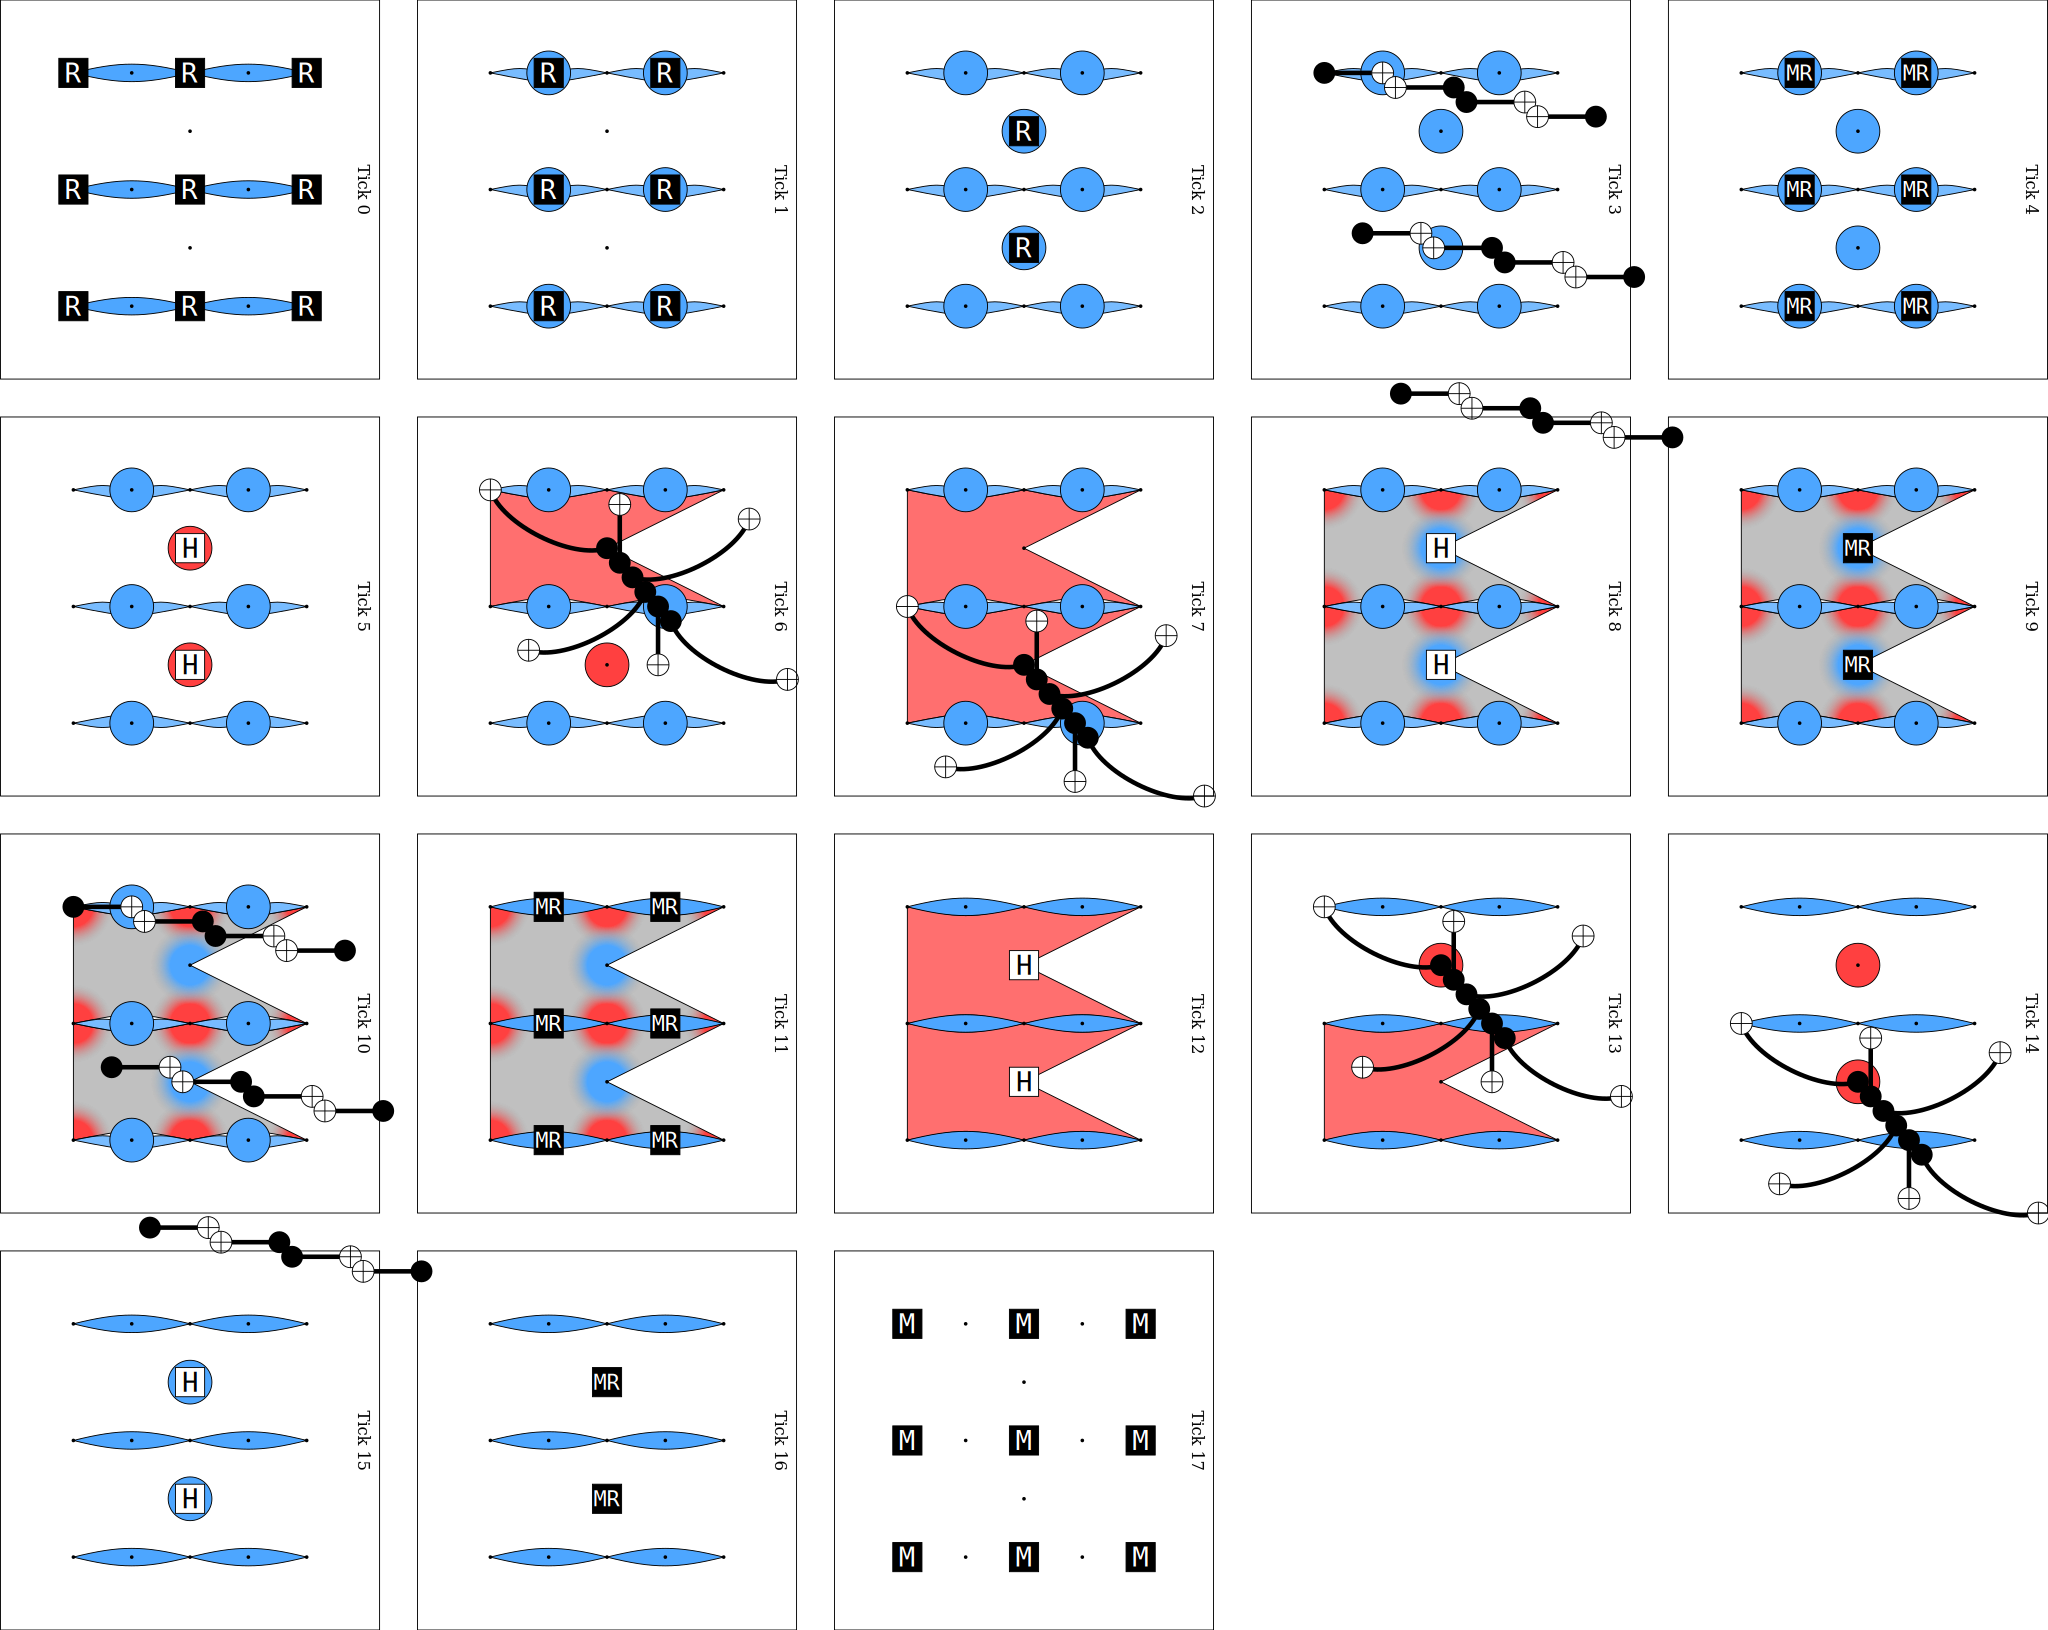

In [ ]:
dia = shor.diagram('detslice-with-ops-svg')
with open('dia.svg', 'w') as f:
    f.write(str(dia))
dia

In [ ]:
.detector_error_model(decompose_errors=True)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Crumble</title>
    <link rel="shortcut icon" href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAYAAABzenr0AAABgWlDQ1BJQ0MgcHJvZmlsZQAAKJF9kTlIA0EUhj+j4kHEwhQiFluolQFREUuNgggRQlTwKtzdnJBdw27ExlKwDVh4NF6FjbW2FraCIHiAWFpZKdpIWN8kgQQxDgzz8c/8j/f+Ad9RxrTchgGw7JwTnQppC4tLWtMrrfiAAC266WbHI5EwNdfXPXXqvAuqWrXf/bnaYnHXhDpNeMzMOjnhVeGRjVxW8Z7qwkzpMeFz4X5HGhR+VLpR4jfFySKrpgk4c9EJ4YCwlqxio4rNlGMJDwv3xCxb6vsWShxTvKnYyqyb5T7VhP64PT+rdNndTDHNDBE0DNZJkyFHUE5bFJeo3Idq+LuK/oi4DHGlMcUxyRoWetGP+oPf2bqJocFSJX8IGl8876MXmnagkPe872PPK5xA/TNc2RX/2hGMfoqer2g9h9C+BRfXFc3Yhctt6HzK6o5elOpl+xIJeD+Tb1qEjltoXS7lVr7n9AHmJKvwDewfQF9Saq/UmLu5Ord/35Tz+wHVp3JoxsjWZAAAAAlwSFlzAAAuIwAALiMBeKU/dgAAAAd0SU1FB+YKAhYQLxXIct8AAAAZdEVYdENvbW1lbnQAQ3JlYXRlZCB3aXRoIEdJTVBXgQ4XAAAAx0lEQVRYw+2XwQ7EIAhEB+N/E76cnkgIa6OuWTFxvTWxdRgKDwmAYu+i+KDKPP62CJjHNYsQ7Psk8iGk7AxdmeGC1e0CvBBbKQK8ljQB5kK2AxcLsJLMdoBKZvQAULMOtk5IR7Dg294+yw4RymUBs3qQ5bHAO34vC8yFPwvSBFhJ3skC35Bq1sHHsKDGKfUX94J46HllGDjd5XnI5WjOXwXQSg5X95eXaaU3zXSjG3XJ79LW1ak1RsX9/qdsldqsPTppo66k6QGRuElWZ7d4CQAAAABJRU5ErkJggg==">
</head>
<style>
    table tr {
        border: 1px solid black;
    }
    table td {
        border: 1px solid black;
        padding-left: 5px;
        padding-right: 5px;
    }
    table th {
        border: 1px solid black;
        padding-left: 5px;
        padding-right: 5px;
    }
</style>
<body style="margin: 0">
    <div style="display: inline-block">
        <div>
            <div style="display: inline-block">
                Crumble is a prototype stabilizer circuit editor.<br>
                <br>
                <a href="https://github.com/quantumlib/Stim/blob/main/glue/crumble/README.md">Read the manual</a>
                <br>
                <br>
                <button id="btnShowExamples">Show Example Circuits</button><br>
                <br>
            </div>
            <div style="display: inline-block">
                <canvas id="toolbox" style="width: 370px; height: 110px; border: 1px solid black; margin: 0; padding: 0;">
                </canvas>
            </div>
            <div id='examples-div' style="border: 1px solid black; margin: 10px; display: none; width: fit-content">
                <strong>Example Circuits</strong>
                <table style="border: 1px solid black; margin: 10px; text-align: left; border-collapse: collapse;">
                    <thead>
                        <tr>
                            <th scope="col">Code</th>
                            <th scope="col">Style</th>
                            <th scope="col">Task</th>
                            <th scope="col">Size</th>
                            <th scope="col">Link</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                            <td>Bacon-Shor Code</td>
                            <td>Interleaved (XZXZ)</td>
                            <td>Memory (H)</td>
                            <td>5x5x3</td>
                            <td><a href="
                                #circuit=Q(0,0)0;Q(0,1)1;Q(0,2)2;Q(0,3)3;Q(0,4)4;Q(1,0)5;Q(1,1)6;Q(1,2)7;Q(1,3)8;Q(1,4)9;Q(2,0)10;Q(2,1)11;Q(2,2)12;Q(2,3)13;Q(2,4)14;Q(3,0)15;Q(3,1)16;Q(3,2)17;Q(3,3)18;Q(3,4)19;Q(4,0)20;Q(4,1)21;Q(4,2)22;Q(4,3)23;Q(4,4)24;POLYGON(0,0,1,0.25)23_24;POLYGON(0,0,1,0.25)18_19;POLYGON(0,0,1,0.25)13_14;POLYGON(0,0,1,0.25)8_9;POLYGON(0,0,1,0.25)3_4;POLYGON(0,0,1,0.25)22_23;POLYGON(0,0,1,0.25)17_18;POLYGON(0,0,1,0.25)12_13;POLYGON(0,0,1,0.25)7_8;POLYGON(0,0,1,0.25)2_3;POLYGON(0,0,1,0.25)21_22;POLYGON(0,0,1,0.25)16_17;POLYGON(0,0,1,0.25)11_12;POLYGON(0,0,1,0.25)6_7;POLYGON(0,0,1,0.25)1_2;POLYGON(0,0,1,0.25)20_21;POLYGON(0,0,1,0.25)15_16;POLYGON(0,0,1,0.25)10_11;POLYGON(0,0,1,0.25)5_6;POLYGON(0,0,1,0.25)0_1;POLYGON(1,0,0,0.25)24_19;POLYGON(1,0,0,0.25)19_14;POLYGON(1,0,0,0.25)14_9;POLYGON(1,0,0,0.25)9_4;POLYGON(1,0,0,0.25)23_18;POLYGON(1,0,0,0.25)18_13;POLYGO
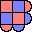

In [ ]:
bs32.diagram("interactive")

In [ ]:
from IPython.display import display, HTML

# This generates the standalone HTML for the visualizer
html_str = str(bs32.diagram("interactive"))
# In Colab, we can sometimes just print the URL or display the HTML
with open("viz.html", "w") as f:
    f.write(html_str)

In [ ]:
print(bs32.to_crumble_url())

https://algassert.com/crumble#circuit=Q(0,0)0;Q(2,0)1;Q(4,0)2;Q(0,2)3;Q(2,2)4;Q(4,2)5;Q(0,4)6;Q(2,4)7;Q(4,4)8;Q(1,0)9;Q(3,0)10;Q(1,2)11;Q(3,2)12;Q(1,4)13;Q(3,4)14;Q(0,1)15;Q(0,3)16;Q(2,1)17;Q(2,3)18;Q(4,1)19;Q(4,3)20;R_0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20;TICK;CX_0_9_1_9_1_10_2_10_3_11_4_11_4_12_5_12_6_13_7_13_7_14_8_14;TICK;MR_9_10_11_12_13_14;TICK;DT(1,0,0)rec[-6];DT(3,0,0)rec[-5];DT(1,2,0)rec[-4];DT(3,2,0)rec[-3];DT(1,4,0)rec[-2];DT(3,4,0)rec[-1];TICK;H_15_16_17_18_19_20;TICK;CX_15_0_15_3_16_3_16_6_17_1_17_4_18_4_18_7_19_2_19_5_20_5_20_8;TICK;H_15_16_17_18_19_20;TICK;MR_15_16_17_18_19_20;TICK;DT(0,1,0)rec[-6];DT(0,3,0)rec[-5];DT(2,1,0)rec[-4];DT(2,3,0)rec[-3];DT(4,1,0)rec[-2];DT(4,3,0)rec[-1];TICK;CX_0_9_1_9_1_10_2_10_3_11_4_11_4_12_5_12_6_13_7_13_7_14_8_14;TICK;MR_9_10_11_12_13_14;TICK;DT(1,0,1)rec[-6]_rec[-18];DT(3,0,1)rec[-5]_rec[-17];DT(1,2,1)rec[-4]_rec[-16];DT(3,2,1)rec[-3]_rec[-15];DT(1,4,1)rec[-2]_rec[-14];DT(3,4,1)rec[-1]_rec[-13];TICK;H_15_16_17_18_19_20;TI

## Noise

In [29]:
!pip install sinter
!pip install pymatching

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.1/626.1 kB 13.6 MB/s eta 0:00:00


In [ ]:
def inject_noise(noiseless_circuit, p_gate, p_dephase):
    """
    p_gate: Standard depolarizing noise on gates.
    p_dephase: Specific Z-error noise (T2) during idles (TICKS).
    """
    noisy_circuit = stim.Circuit()
    num_qubits = noiseless_circuit.num_qubits

    for op in noiseless_circuit: #.flattened_operations():
        # Always add the original operation first
        noisy_circuit.append(op)

        # Only add noise to actual quantum gates/measurements
        # Skip metadata like QUBIT_COORDS
        if op.name in ["CNOT", "CX", "CZ"]:
            noisy_circuit.append("DEPOLARIZE2", op.targets_copy(), p_gate)

        elif op.name in ["H", "X", "Y", "Z"]:
            # These are gate targets (integers)
            noisy_circuit.append("DEPOLARIZE1", op.targets_copy(), p_gate)

        elif op.name in ["MR", "M"]:
            # Measurement noise (X_ERROR before measurement simulates bit-flip readout error)
            noisy_circuit.append("X_ERROR", op.targets_copy(), p_gate)

        elif op.name == "TICK":
            # This is where we model the dot's dephasing over time [cite: 2026-02-02]
            # We apply Z_ERROR to all qubits during every time step
            noisy_circuit.append("Z_ERROR", range(num_qubits), p_dephase)

    return noisy_circuit

p = 0.001 # 0.1% error rate
noisy = inject_noise(bs32, p, p)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_logical_error(d, r, physical_p):
    # 1. Create noiseless
    base = gen_bs(d, r)
    # 2. Inject noise (Let's assume T2 dephasing is 5x worse than gate noise) [cite: 2026-02-02]
    noisy = inject_noise(base, p_gate=physical_p, p_dephase=physical_p * 5)

    # 3. Sample and Decode (using pymatching)
    sampler = noisy.compile_detector_sampler()
    defects, obs = sampler.sample(shots=5000, separate_observables=True)

    import pymatching
    matching = pymatching.Matching.from_stim_circuit(noisy)
    predictions = matching.decode_batch(defects)

    return np.mean(predictions != obs.flatten())

# Perform the sweep
ps = np.logspace(-4, -1, 10) # From 0.01% to 10%
errors_d3 = [calculate_logical_error(3, 3, p) for p in ps]
errors_d5 = [calculate_logical_error(5, 3, p) for p in ps]

plt.loglog(ps, errors_d3, label="d=3")
plt.loglog(ps, errors_d5, label="d=5")
plt.xlabel("Physical Error Rate (p)")
plt.ylabel("Logical Error Rate")
plt.legend()
plt.show()

ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(5, 15), filter_coords=['D33', 'D35', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 5:15 --filter_coords D33:D35 > output_image.svg

This was discovered while analyzing a Z-basis demolition measurement (MR) on:
    qubit 14 [coords (3, 4)]

The collapse anti-commuted with these detectors/observables:
    D33 [coords (2, 3, 2)]
    D35 [coords (4, 3, 2)]

The backward-propagating error sensitivity for D33 was:
    X11 [coords (1, 2)]
    X12 [coords (3, 2)]
    X13 [coords (1, 4)]
    X14 [coords (3, 4)]
    Z18 [coords (2, 3)]

The backward-propagating error sensitivity for D35 was:
    X12 [coords (3, 2)]
    X14 [coords (3, 4)]
    Z20 [coords (4, 3)]

Circuit stack trace:
    during TICK layer #11 of 26
    at instruction #69 [which is MR 9 10 11 12 13 14]